In [ ]:
# Imports
library(Seurat)
library(SingleCellExperiment)
library(SingleR)
library(celldex)    
library(ggplot2)
library(clustree)
library(stringr) 
library(gridExtra)
library(dplyr)

# Change setting for visualizing plots within VSCODE
options(repr.plot.width=20, repr.plot.height=12)

# Read myeloid data
myeloid_data <- readRDS("../../../data/R Objects/Myeloid R Objects/all_mice_myeloid_data_v3.rds")

Warning message:
"package 'Seurat' was built under R version 4.4.2"
Loading required package: SeuratObject

Warning message:
"package 'SeuratObject' was built under R version 4.4.2"
Loading required package: sp

Warning message:
"package 'sp' was built under R version 4.4.2"

Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.4.2"

Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, 

In [ ]:
# Viw amount of myeloid cells
ncol(myeloid_data)

[1] 2169

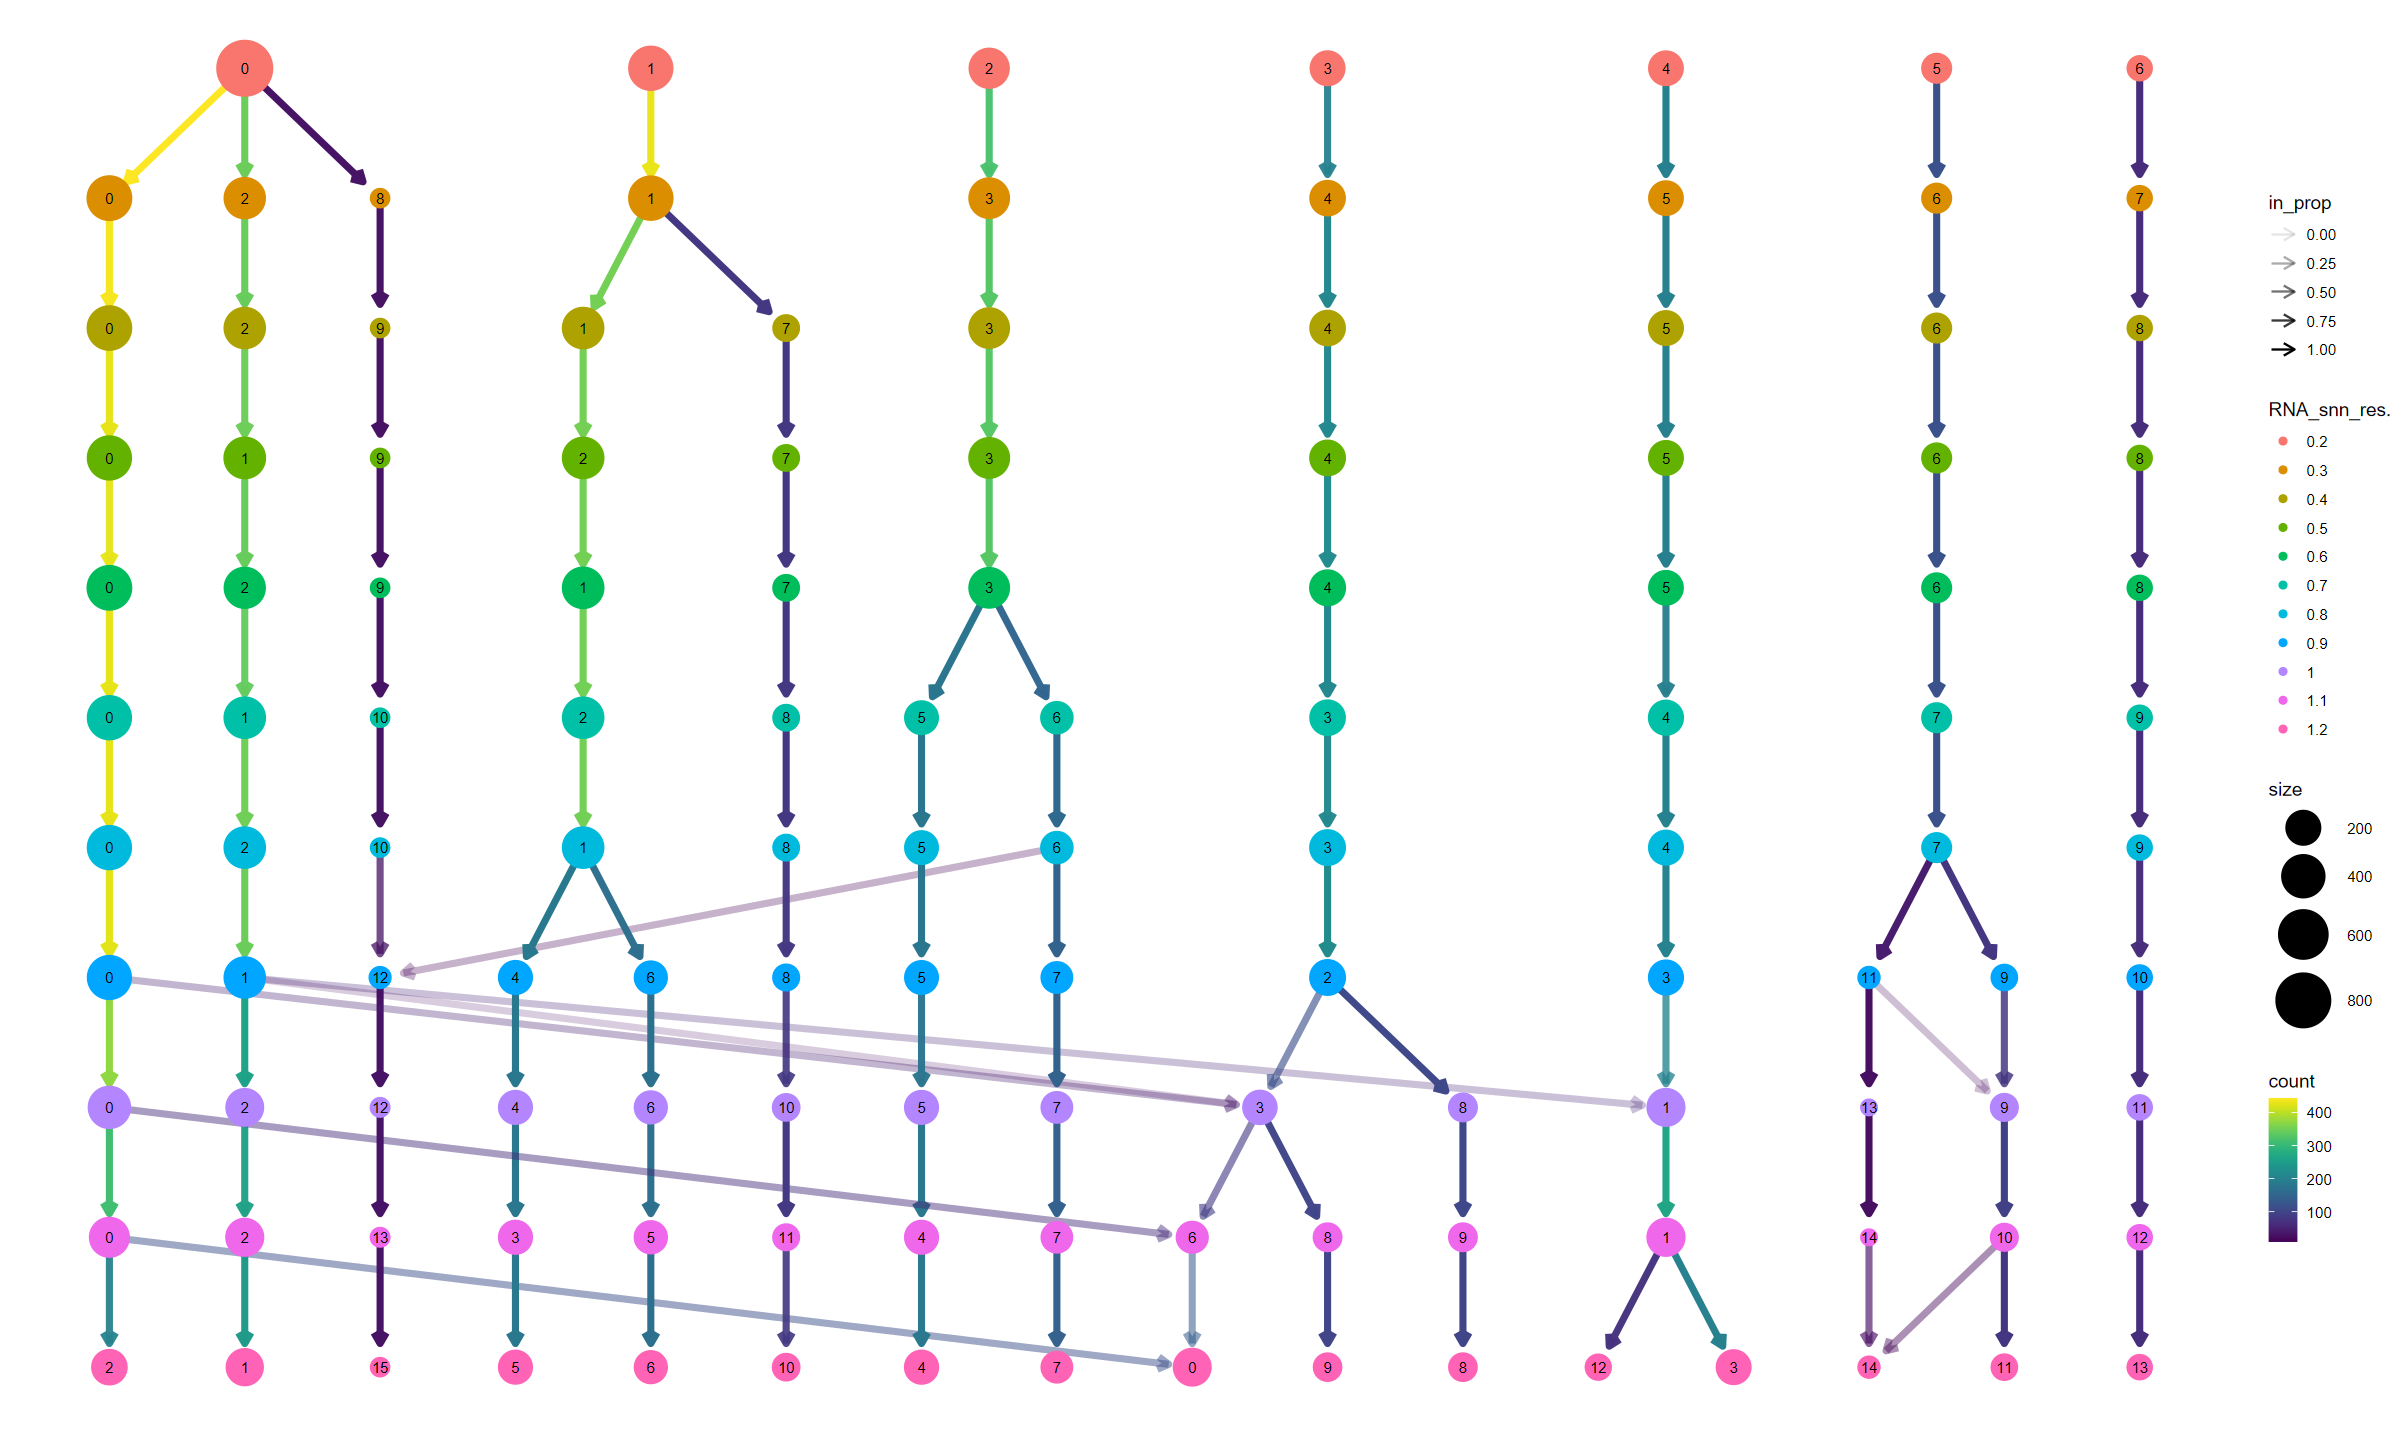

In [8]:
# This cell is meant to analyze the different resolutions and see which one is the best
clustree(myeloid_data, prefix= "RNA_snn_res.", layout = "sugiyama")

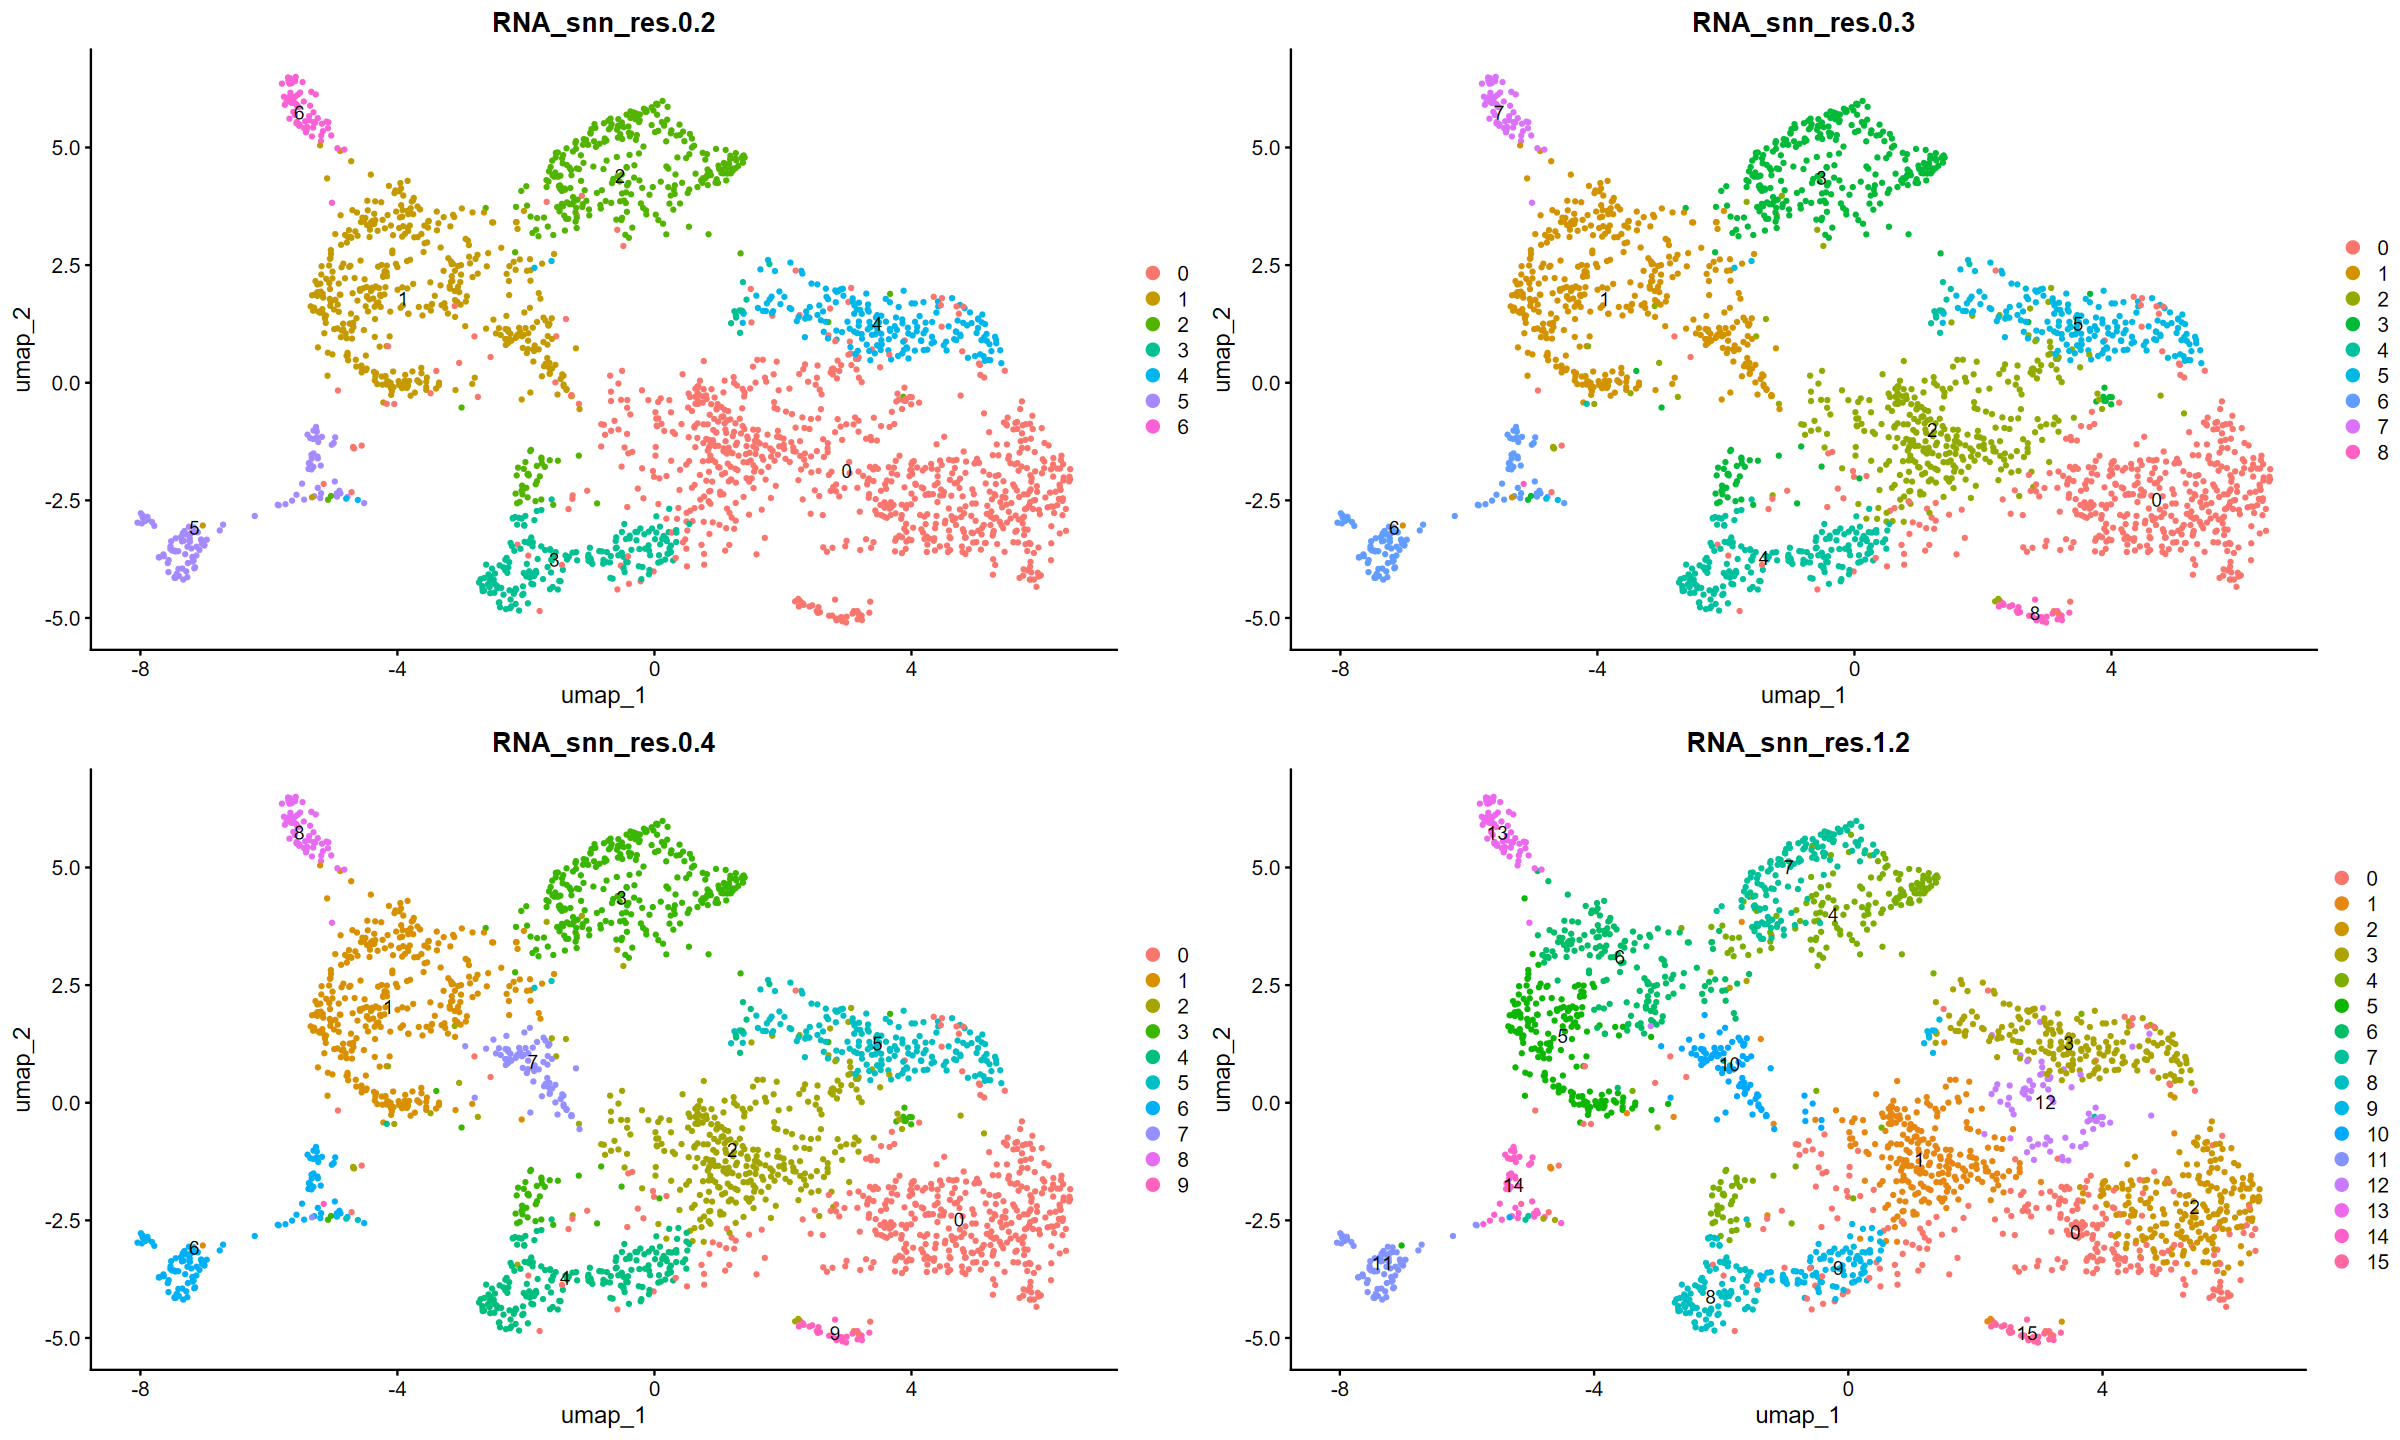

In [3]:
# Get DimPlots of different resolutions
res_1 <- DimPlot(myeloid_data, reduction = "umap", group.by = "RNA_snn_res.0.2", label = T)
res_2 <- DimPlot(myeloid_data, reduction = "umap", group.by = "RNA_snn_res.0.3", label = T)
res_3 <- DimPlot(myeloid_data, reduction = "umap", group.by = "RNA_snn_res.0.4", label = T)
res_4 <- DimPlot(myeloid_data, reduction = "umap", group.by = "RNA_snn_res.1.2", label = T)

# Plot
grid.arrange(res_1, res_2, res_3, res_4, ncol=2)

# Assign the slot "Seurat Cluster" to the desired resolution
myeloid_data$seurat_clusters <- myeloid_data$`RNA_snn_res.1.2`

In [ ]:
# View distribution of idents before assigning resolution
table(Idents(myeloid_data))

# Assign resolution to identity
myeloid_data <- SetIdent(myeloid_data, value = "RNA_snn_res.1.2")

# View distribution of idents after assigning resolution
table(Idents(myeloid_data))


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14 
312 268 266 184 183 169 149 142 102 102  92  80  65  30  25 


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 
261 247 212 199 185 183 167 144 100  99  88  76  73  65  41  29 

Calculating cluster 0



Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Warning message in DoHeatmap(myeloid_data, features = top10$gene, size = 1, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: Cd247, Gimap9, Dntt, 4930430E12Rik, Gna12, 9530068e07rik, 37316, 5031425e22rik, 37500, 42248"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


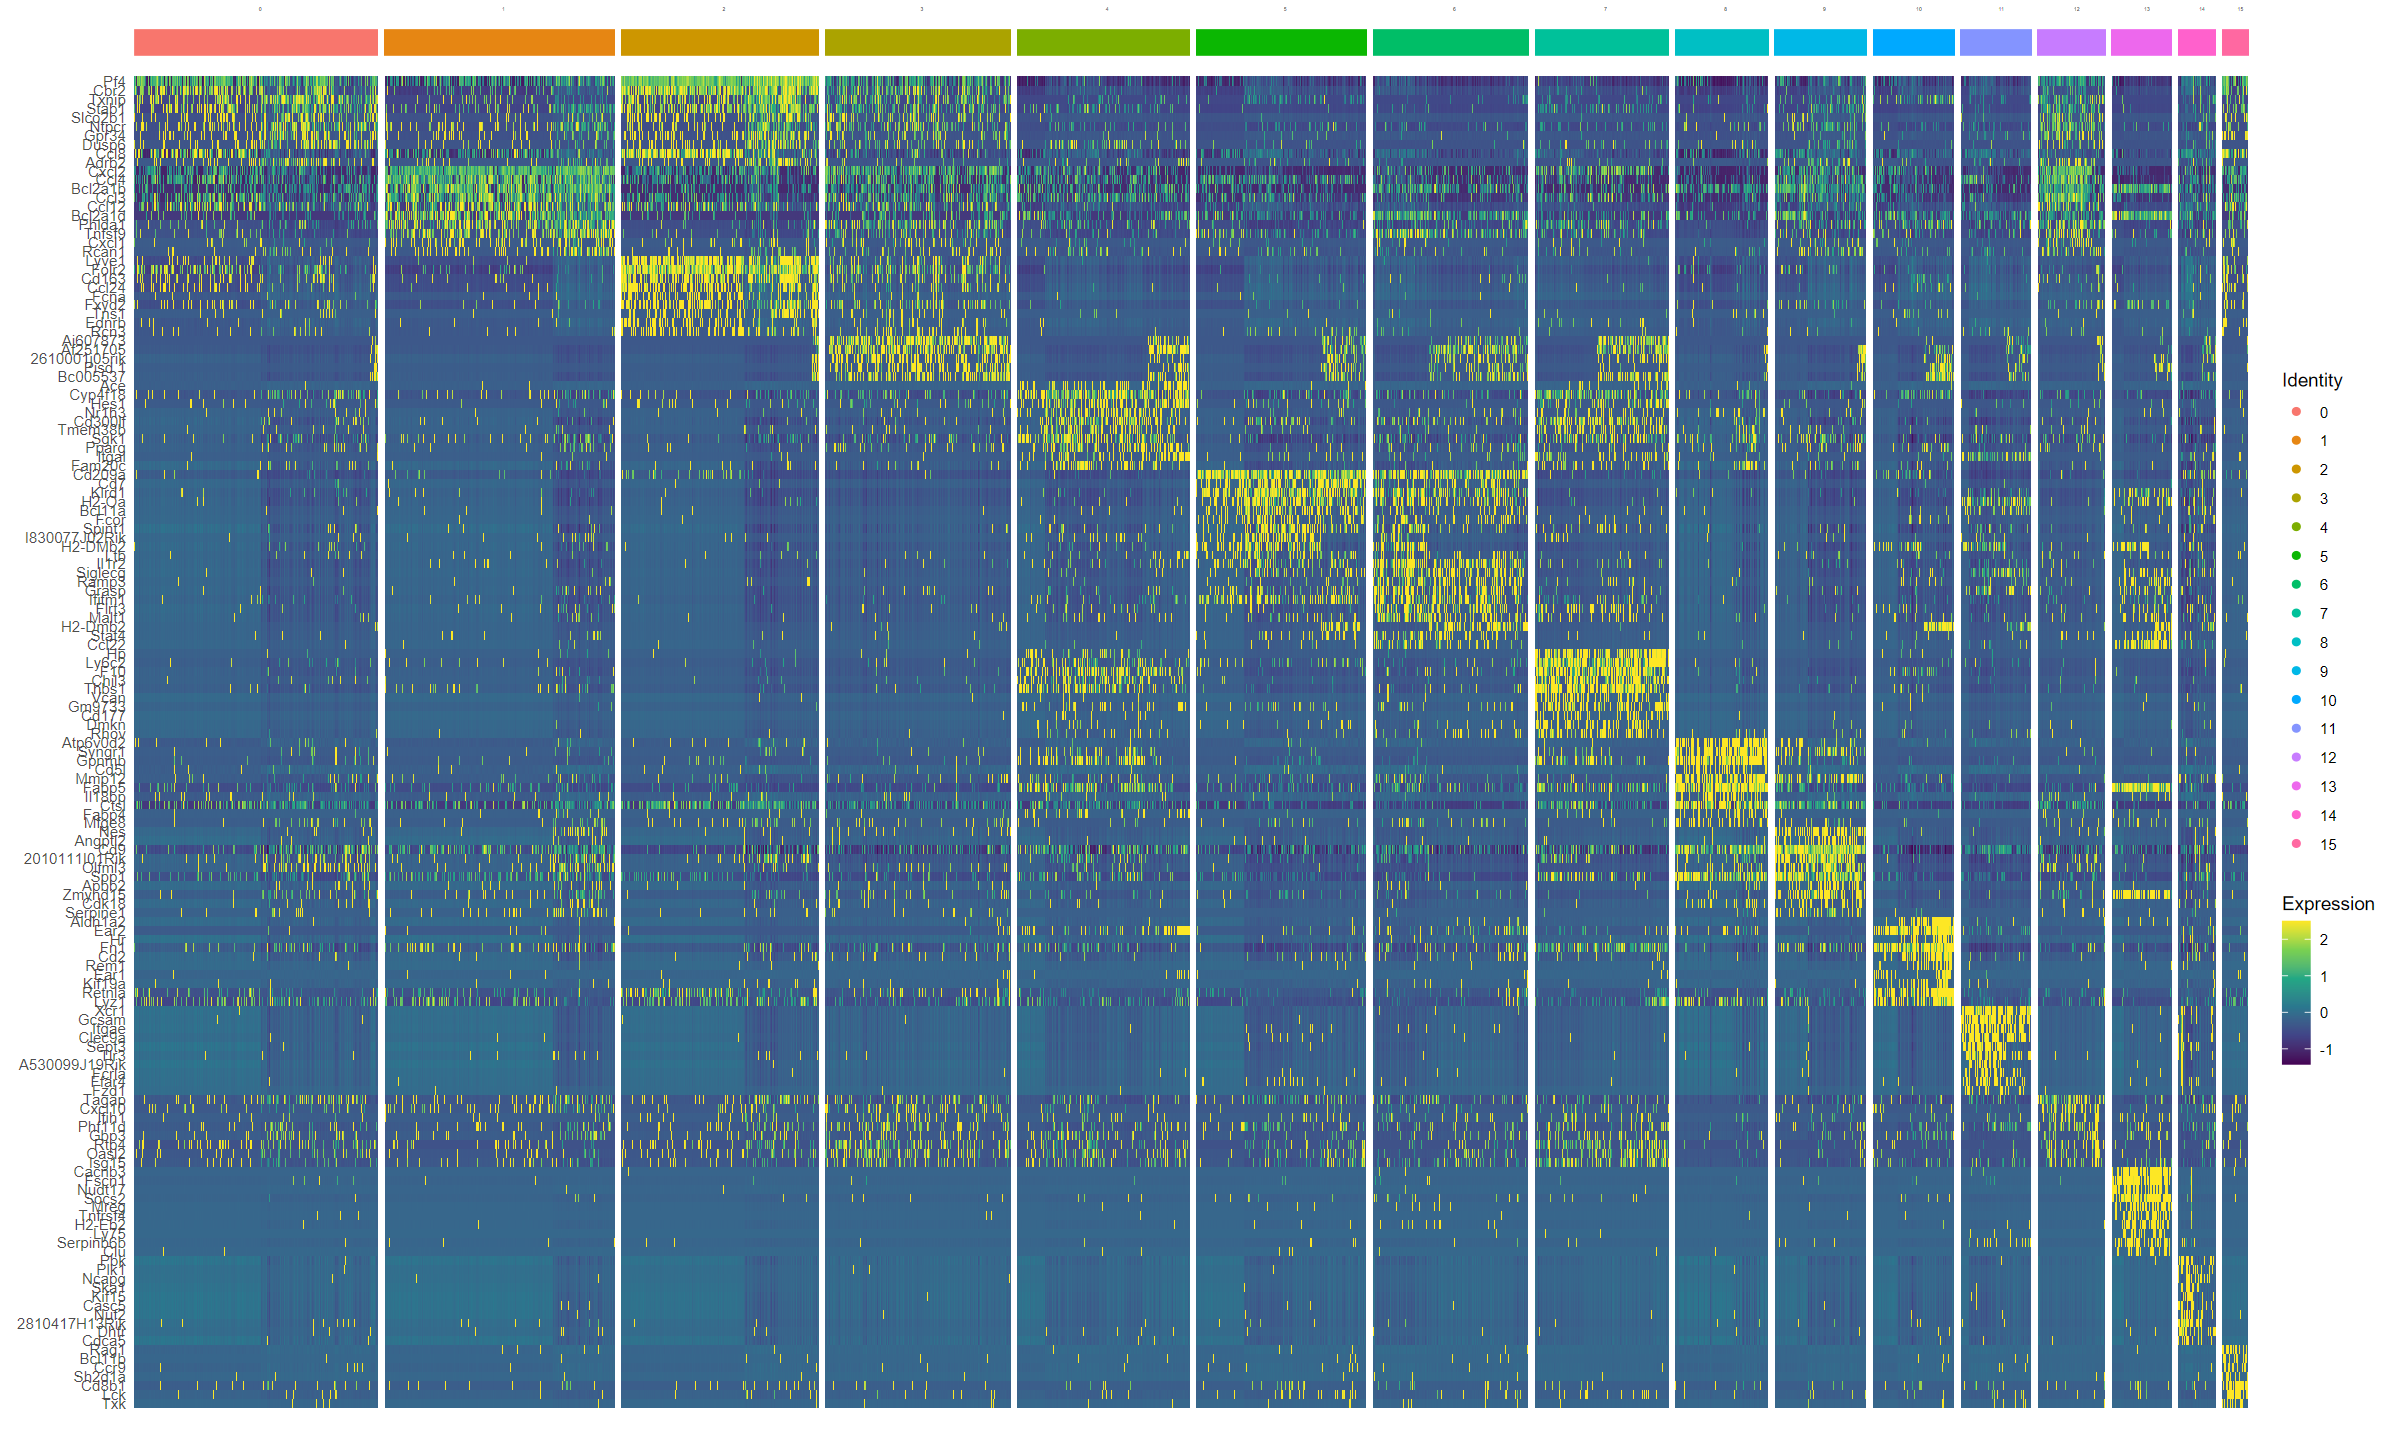

In [ ]:
# Find markers for each cluster
markers <- FindAllMarkers(myeloid_data, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 10) %>%
  ungroup() -> top10

# Heatmap
top10 <- markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)
DoHeatmap(myeloid_data, features = top10$gene, size=1, angle=0, raster=FALSE) &
  scale_fill_viridis_c(option="blue",na.value = "white")

In [ ]:
# Filter markers
markers %>%  group_by(cluster) %>% filter(as.numeric(as.character(cluster)) > 9) %>% filter(p_val_adj < 0.05) %>% slice_max(order_by = avg_log2FC, n = 10) %>% arrange(cluster, desc(pct.1)) 

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene         
1   1.397493e-70 4.066140   0.886 0.189  4.284994e-66 10      Fn1          
2  1.222728e-103 4.167623   0.807 0.086  3.749128e-99 10      Ear2         
3   3.551759e-47 4.754560   0.693 0.165  1.089040e-42 10      Retnla       
4   1.382687e-27 4.480595   0.670 0.246  4.239595e-23 10      Lyz1         
5   2.799212e-62 4.119323   0.466 0.043  8.582945e-58 10      Cd2          
6  1.042752e-126 5.883751   0.455 0.012 3.197287e-122 10      Aldh1a2      
7   8.170337e-52 3.970498   0.307 0.020  2.505189e-47 10      Kif19a       
8   2.176066e-82 6.074335   0.273 0.006  6.672253e-78 10      Hr           
9   1.784070e-58 4.354714   0.273 0.012  5.470315e-54 10      Ear1         
10  7.111944e-60 5.777212   0.250 0.009  2.180664e-55 10      Rem1         
11 2.756042e-274 6.985774   0.737 0.007 8.450575e-270 11      Xcr1         
12 3.027790e-248 6.601581   0.671 0.006 9.283810e-244 11      Gcsam        
13 7.432093e-190 6.608336   0.579 0.009 2.278828e-185 11      Itgae        
14 5.163740e-171 5.751131   0.579 0.011 1.583306e-166 11      Clec9a       
15 2.161790e-123 4.885787   0.500 0.015 6.628479e-119 11      Tlr3         
16 8.477606e-129 6.384060   0.408 0.007 2.599403e-124 11      Sept3        
17  2.163132e-77 4.856099   0.355 0.013  6.632595e-73 11      Ffar4        
18  9.017615e-87 5.800555   0.329 0.009  2.764981e-82 11      Fcrla        
19  3.247083e-97 6.814938   0.263 0.002  9.956205e-93 11      A530099J19Rik
20  1.812790e-69 5.069985   0.250 0.006  5.558377e-65 11      Fzd1         
21  4.659482e-16 1.712605   0.932 0.687  1.428690e-11 12      Hspa1a       
22  1.196226e-09 1.703097   0.644 0.374  3.667868e-05 12      Dnajb1       
23  3.707779e-14 1.894384   0.534 0.189  1.136879e-09 12      Tagap        
24  6.899784e-15 1.764349   0.479 0.145  2.115612e-10 12      Egr2         
25  3.905534e-09 1.668918   0.425 0.165  1.197515e-04 12      Irf1         
26  6.805869e-13 1.831735   0.397 0.121  2.086815e-08 12      Gna12        
27  1.213611e-13 2.572556   0.384 0.110  3.721174e-09 12      Cxcl10       
28  1.538424e-07 1.797530   0.288 0.104  4.717117e-03 12      Slfn8        
29  1.062211e-08 2.329297   0.260 0.077  3.256951e-04 12      Ifih1        
30  1.686214e-10 1.833714   0.260 0.065  5.170268e-06 12      4930430E12Rik
31 1.519525e-188 6.917144   0.800 0.025 4.659166e-184 13      Socs2        
32 1.538375e-222 9.546815   0.769 0.015 4.716967e-218 13      Fscn1        
33 9.294826e-274 8.691774   0.677 0.003 2.849979e-269 13      Cacnb3       
34 6.748767e-222 8.927850   0.554 0.003 2.069307e-217 13      Nudt17       
35 7.884943e-163 7.572645   0.492 0.006 2.417681e-158 13      Mreg         
36  2.889595e-92 6.610375   0.477 0.020  8.860075e-88 13      Serpinb6b    
37 3.475605e-118 6.542029   0.462 0.011 1.065690e-113 13      H2-Eb2       
38 6.457670e-137 7.760311   0.415 0.005 1.980051e-132 13      Tnfrsf4      
39  1.817251e-88 8.123992   0.292 0.005  5.572055e-84 13      Clu          
40  5.393266e-99 7.203460   0.292 0.003  1.653683e-94 13      Ly75         
41  1.473655e-80 6.173657   0.488 0.017  4.518521e-76 14      2810417H13Rik
42  1.040882e-74 5.905581   0.415 0.012  3.191552e-70 14      Dhfr         
43 4.648782e-143 7.500839   0.366 0.001 1.425410e-138 14      Pbk          
44 1.327329e-117 6.940849   0.341 0.002 4.069857e-113 14      Plk1         
45 1.478819e-117 6.376321   0.341 0.002 4.534355e-113 14      Ncapg        
46  3.625322e-82 6.955846   0.293 0.004  1.111596e-77 14      Casc5        
47  1.008705e-81 6.029684   0.293 0.004  3.092892e-77 14      Nuf2         
48 7.201186e-107 8.120264   0.268 0.001 2.208028e-102 14      Ska1         
49  5.105020e-99 6.569567   0.268 0.001  1.565301e-94 14      Kif15        
50  2.741761e-72 6.179355   0.268 0.004  8.406786e-68 14      Cdca5        
51  3.006538e-47 5.238926   0.724 0.064  9.218645e-43 15      Cd8b1        
52  9.943346e-45 5.163091   0.621 0.047  3.048829e-

In [ ]:
# Marker genes 
myeloid_data <- SetIdent(myeloid_data, value = "seurat_clusters")
#features_macrophage <- c("Cd14", "Cd68", "Fcgr3", "Fcgr1", "Ccr5", "Cd163", "Fut4", "Itgax", "Itgam", "Cd80", "Cd86")
#features_monocytes <- c("C1qc", "C1qb", "C1qa", "Mertk", "Pga5", "Pcdh12", "Aldh1a1", "C2", "Avpr2", "Cxcr3", "Cttnbp2") # https://www.proteinatlas.org/humanproteome/single+cell/immune+cell/monocytes#classical_monocytes
#features_monocytes <- c("Itgam", "Csf1r", "Ly6c1", "Sell", "Itgax", "Ccr1", "Ccr5")
features_monocytes <- c("Irf7", "Mx1", "Il1rn", "Ifit1", "Ifit3", "Cxcl10", "Csf1r", "Mnda", "Clec4a2", "Ly6c2", "Ly6c1", "Cd44")
features_macrophage <- c("Lyz2", "Csf1r", "Cd68", "Aif1", "Cybb", "Cd14", "Dab2", "Ccl6", "Clec4a2", "Ms4a7", "H2-Ab1", "H2-Eb1")
features_dcs <- c("Ctss", "H2-Ab1", "H2-Eb1", "Batf3", "Xcr1", "Irf8", "Aif1", "Cd83", "H2afy", "Flt3", "Napsa", "H2-Dma")
features_monocytes <- c("Csf1r", "Itgam", "Cx3cr1", "Ly6c1", "Ly6c2", "Ccr2", "Sell", "Spn", "Irf7", "Mx1", "Il1rn")


# Add a module score to the Seurat object
myeloid_data <- AddModuleScore(myeloid_data, features = list(features_macrophage), name = "FeatureGeneScore_macrophages")
myeloid_data <- AddModuleScore(myeloid_data, features = list(features_monocytes), name = "FeatureGeneScore_monocytes")
myeloid_data <- AddModuleScore(myeloid_data, features = list(features_dcs), name = "FeatureGeneScore_dcs")

# Vln plots
macrophage_vln <- VlnPlot(myeloid_data, features = "FeatureGeneScore_macrophages1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for macrophage markers")
monocyte_vln <- VlnPlot(myeloid_data, features = "FeatureGeneScore_monocytes1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for monocyte markers")
dc_vln <- VlnPlot(myeloid_data, features = "FeatureGeneScore_dcs1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for dendritic cell markers")

# Visualizing DotPlots to view marker genes
macrophage_dot <- DotPlot(myeloid_data, features = features_macrophage) + 
  ggtitle("Markers for Macrophages") + RotatedAxis()

monocyte_dot <- DotPlot(myeloid_data, features = features_monocytes) + 
  ggtitle("Markers for monocytes") + RotatedAxis()
dc_dot <- DotPlot(myeloid_data, features = features_dcs) + 
  ggtitle("Markers for dendritic cells") + RotatedAxis()


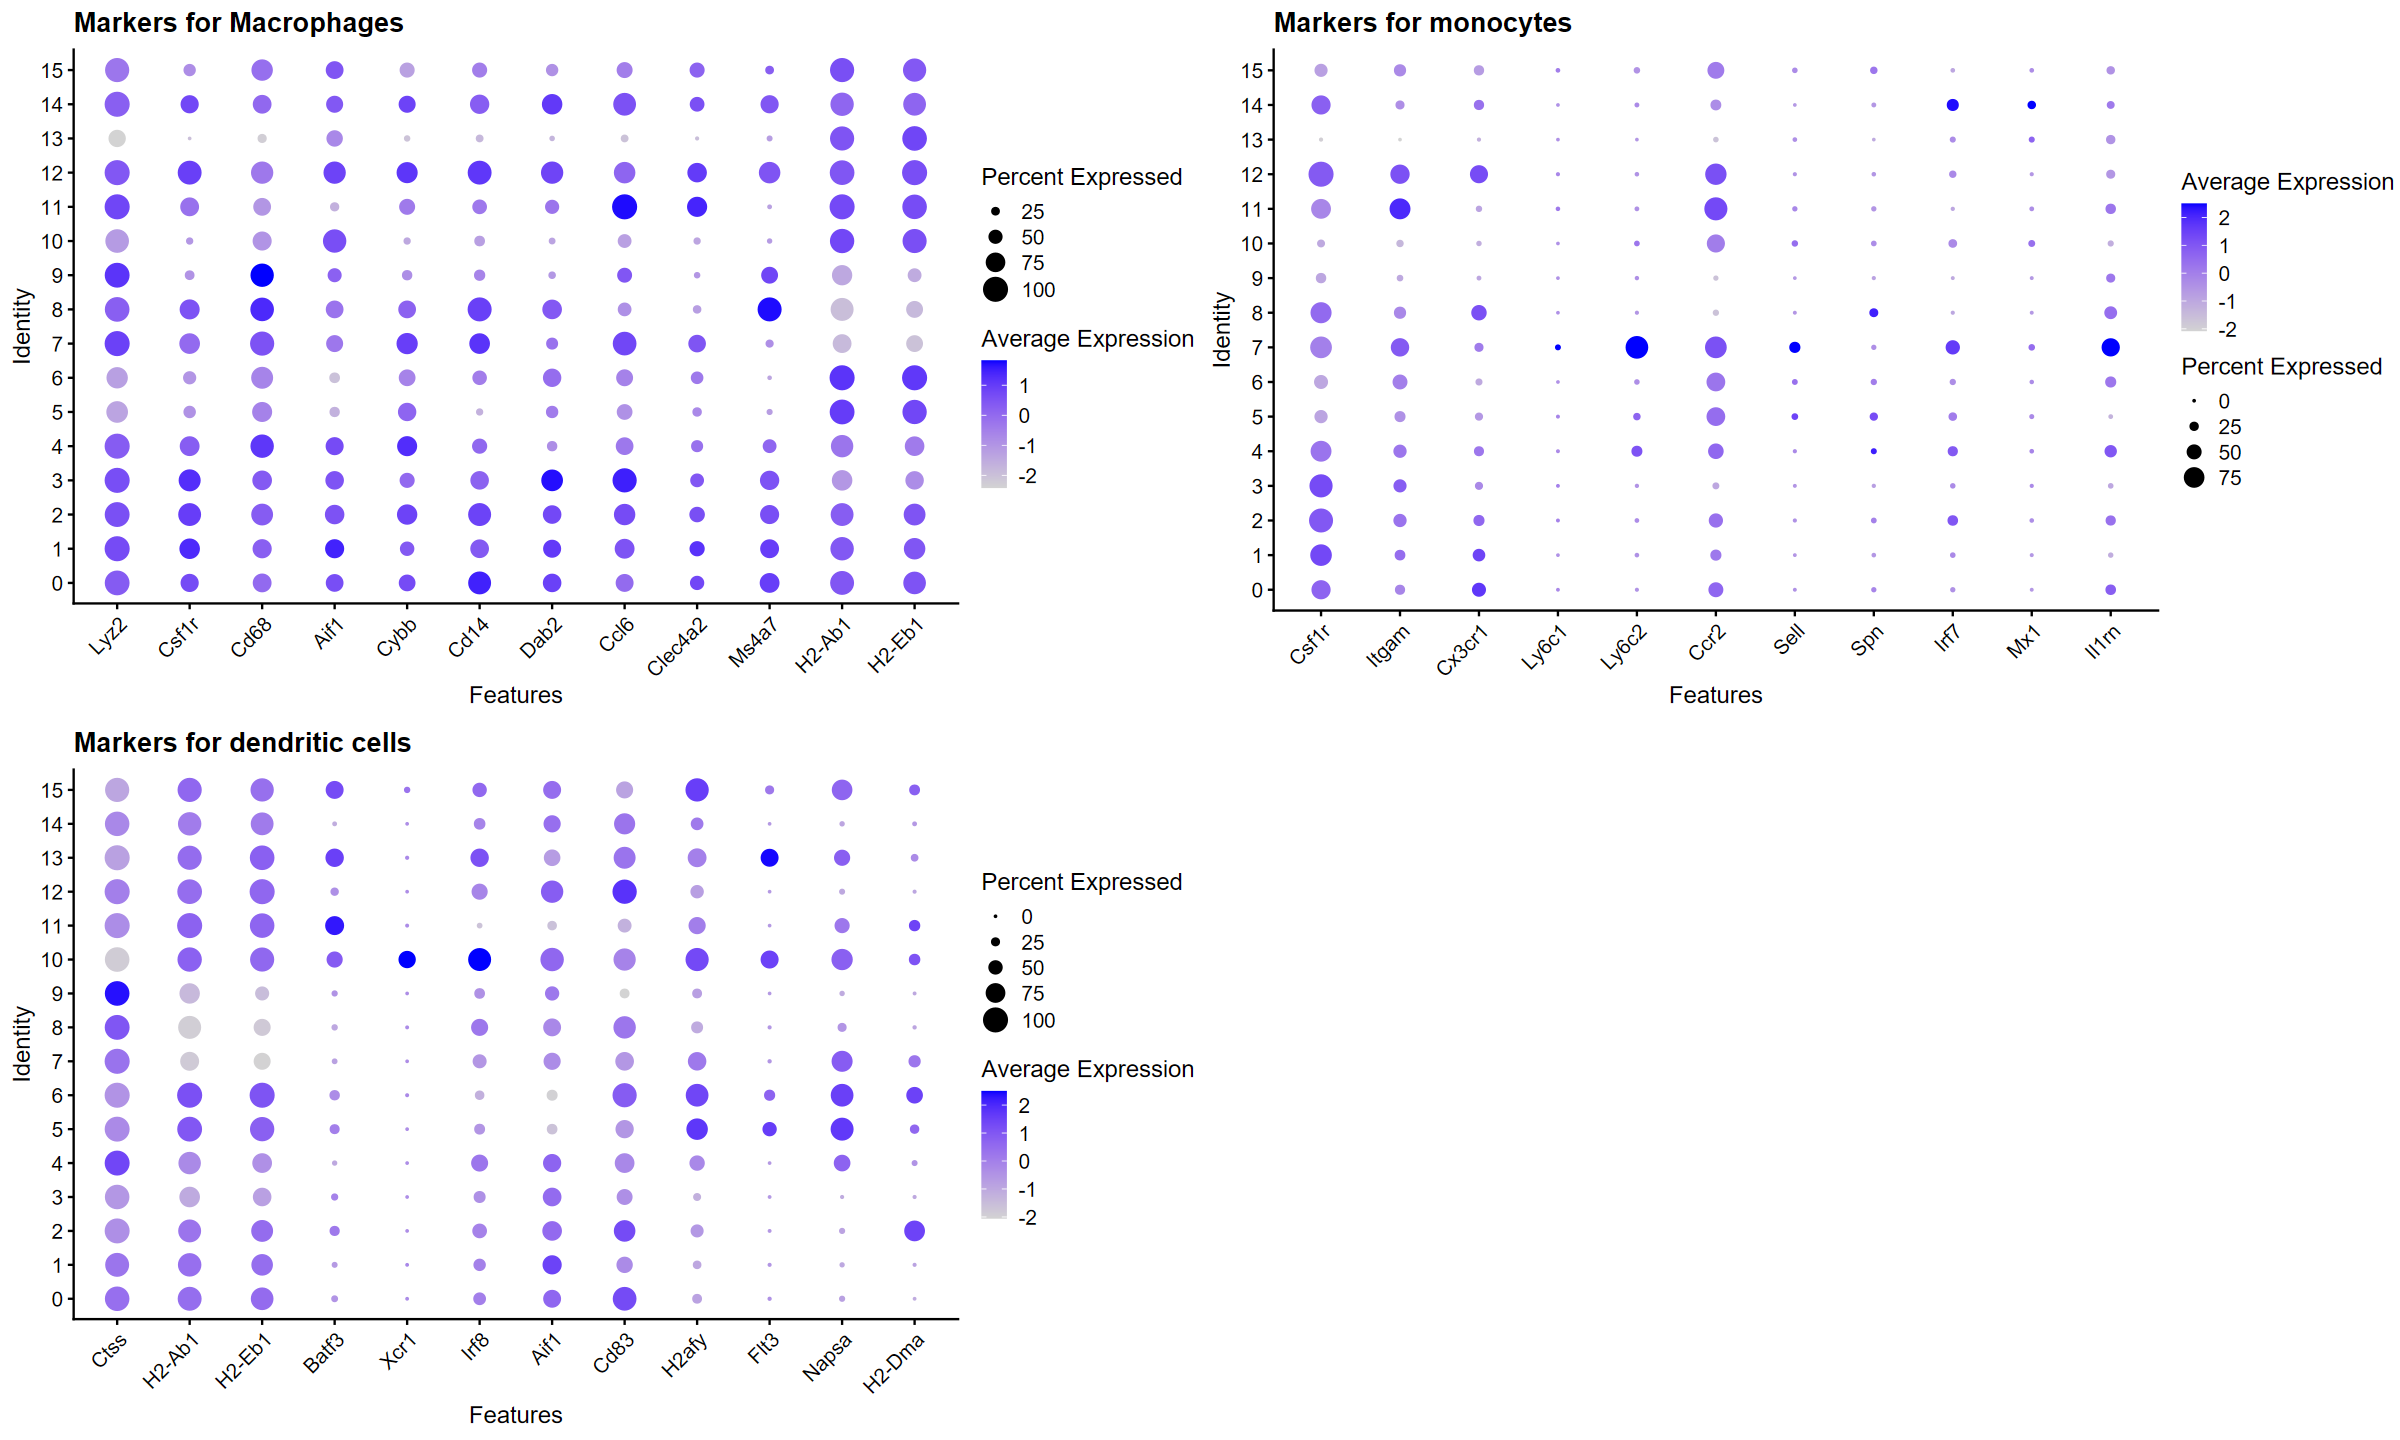

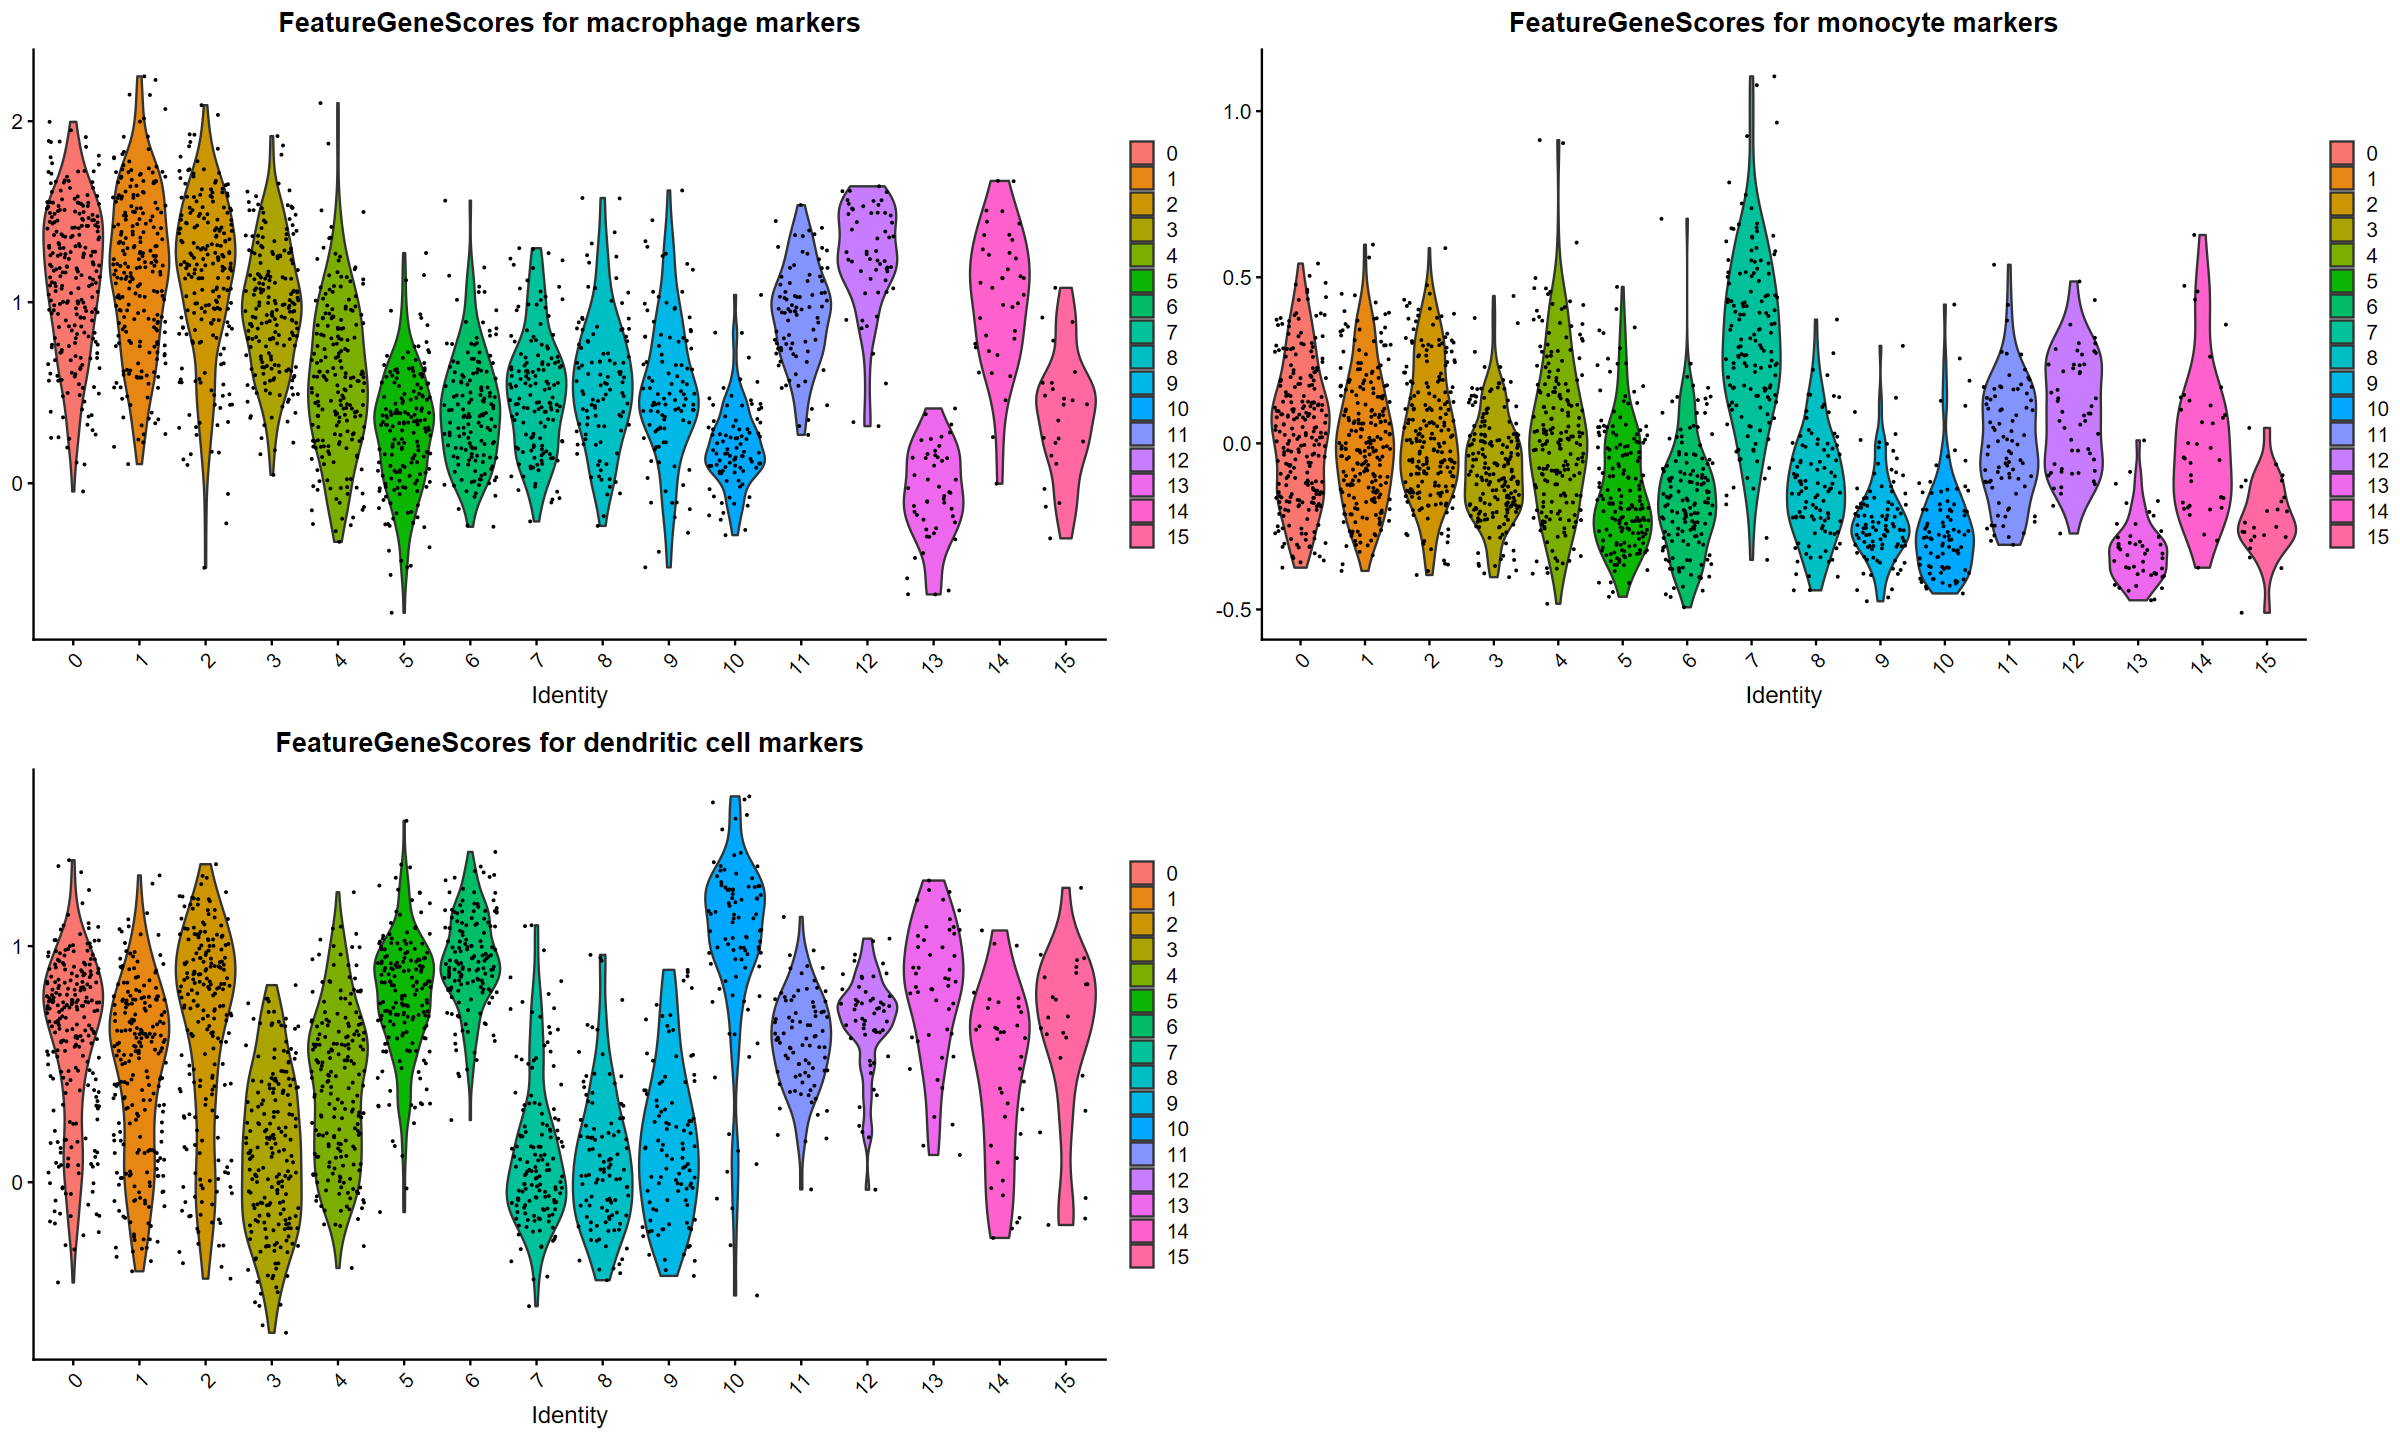

In [18]:
# Plot
grid.arrange(macrophage_dot, monocyte_dot, dc_dot, ncol = 2)
grid.arrange(macrophage_vln, monocyte_vln, dc_vln, ncol=2)

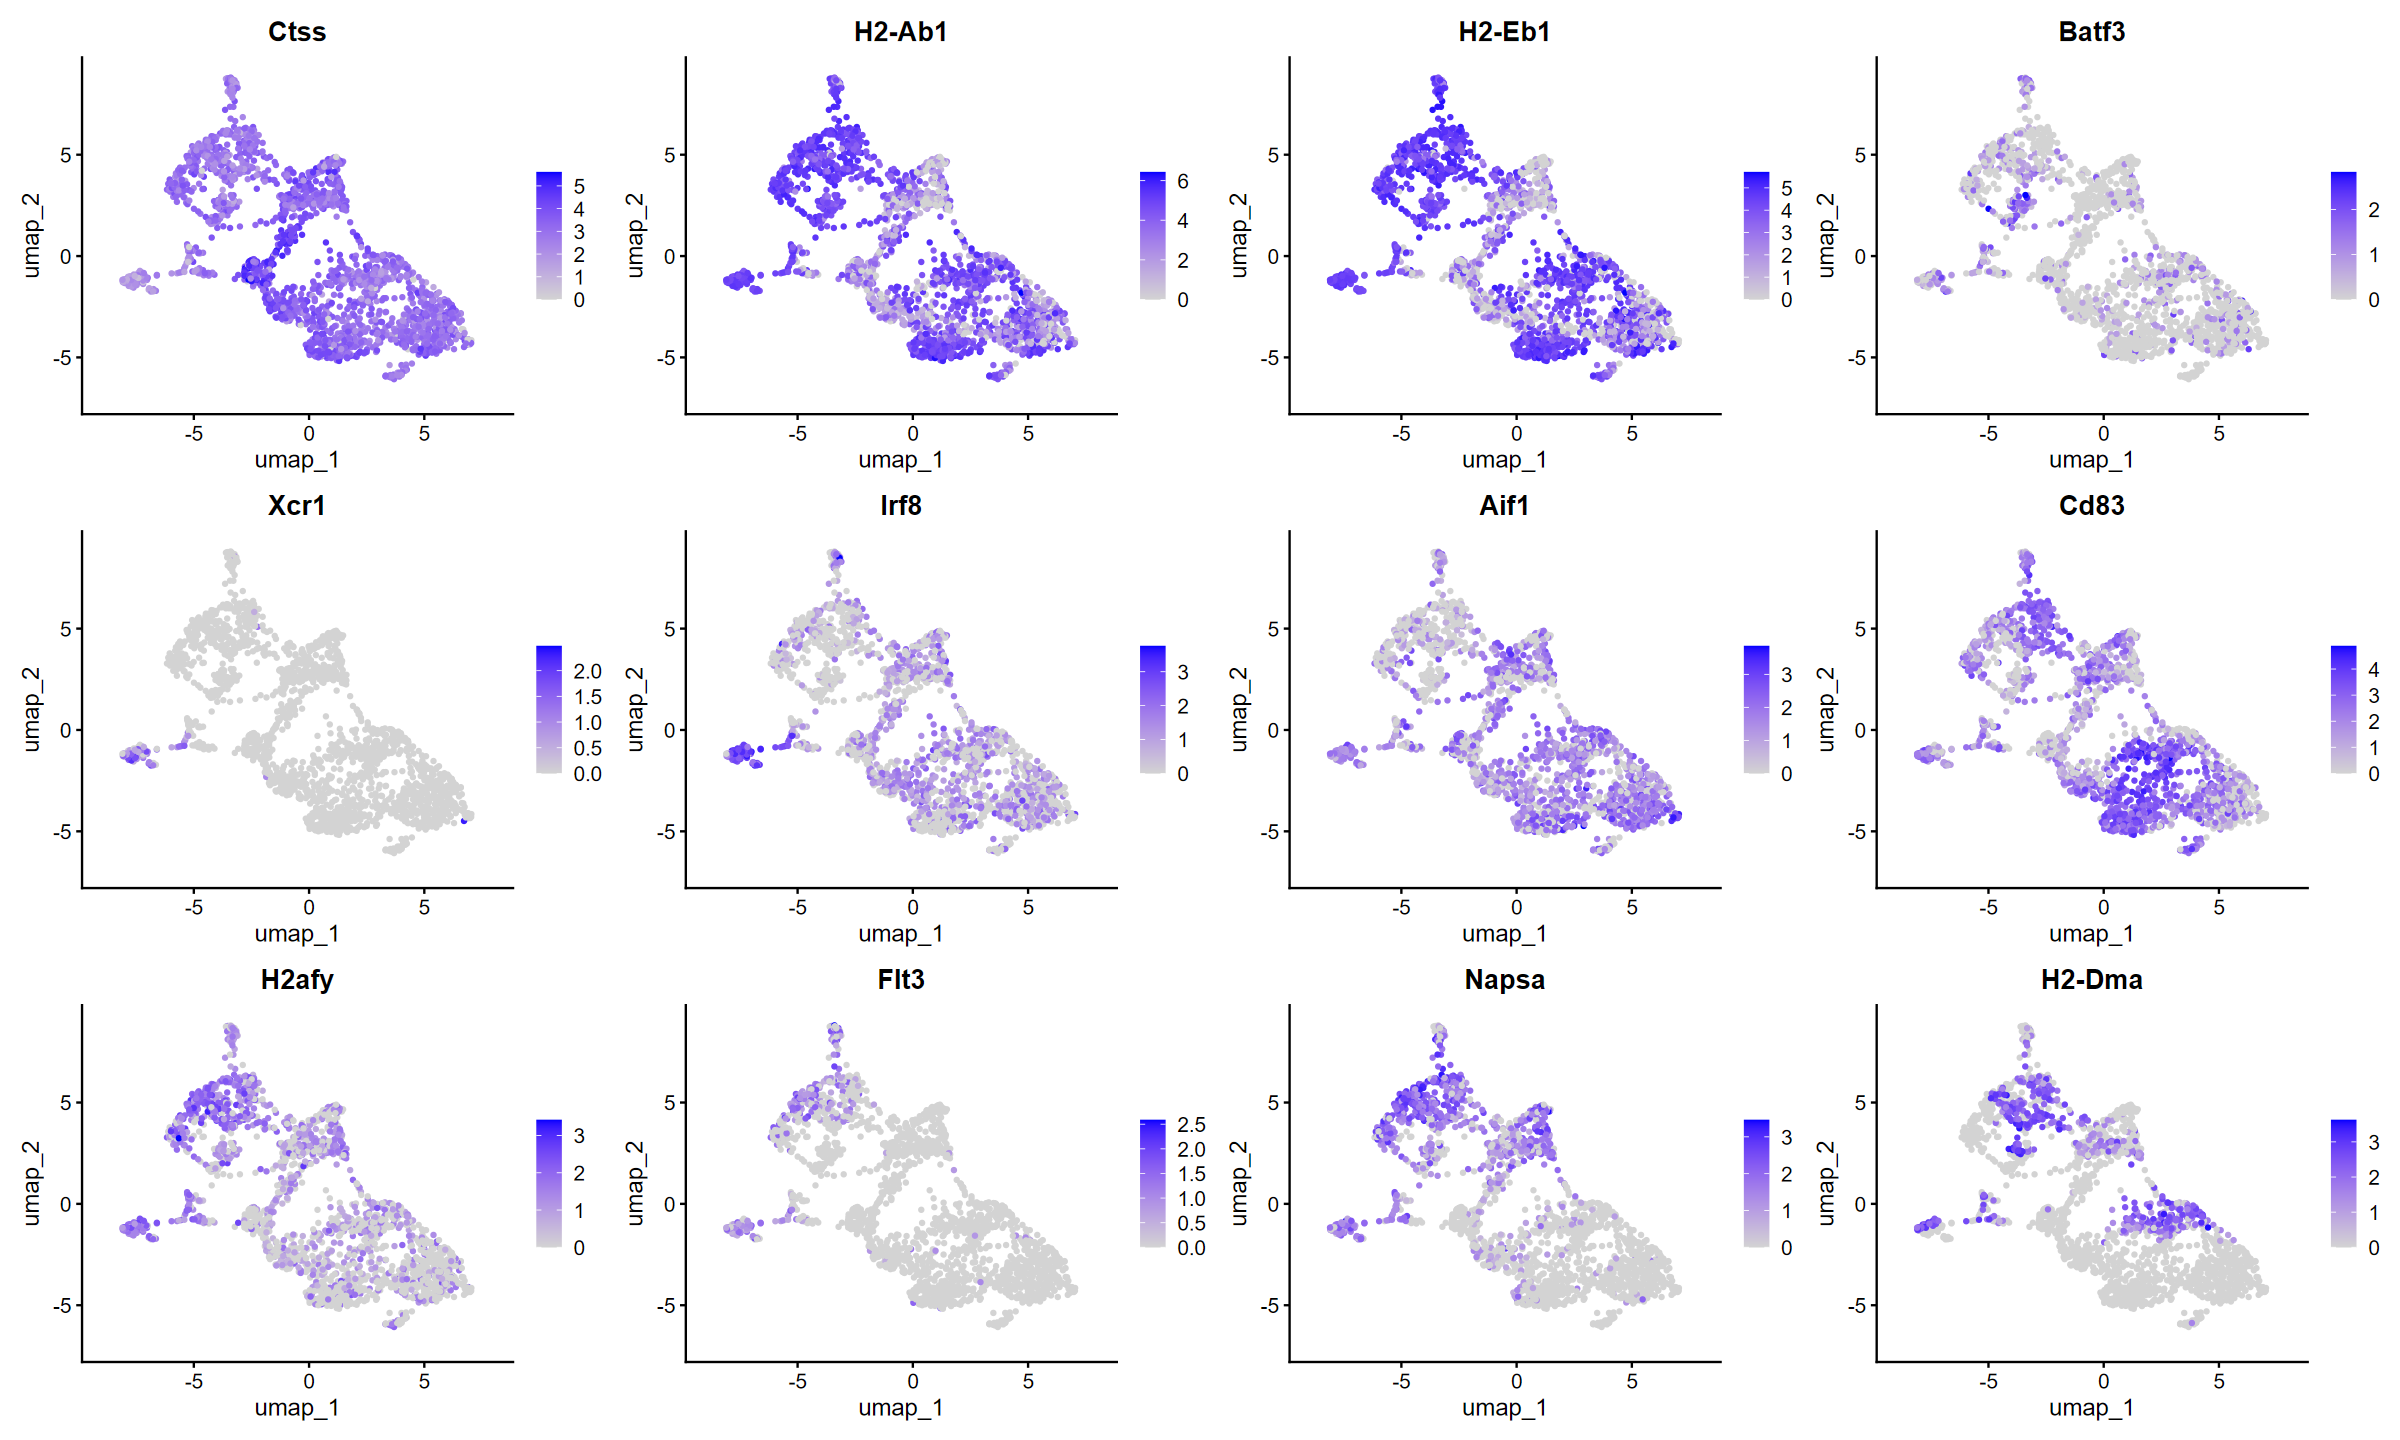

In [ ]:
# Feature plot of DC marker genes
FeaturePlot(myeloid_data, features = features_dcs)

In [ ]:
# This cell block is needed to find the different markers between several clusters of which we dont know the identity
myeloid_data <- SetIdent(myeloid_data, value = "seurat_clusters")
markers <- FindMarkers(myeloid_data, ident.1 = "10", ident.2 = "0",  only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 5) %>%
  ungroup() -> top10

# Markers
markers %>% filter(p_val_adj < 0.05) %>% slice_max(order_by = avg_log2FC, n = 8) %>% arrange(desc(pct.1))

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
Ear2          1.536861e-90 8.334979   0.957 0.007 4.712323e-86
Upb1          5.822098e-60 9.389566   0.609 0.000 1.785172e-55
Rpl13-Ps3     1.689608e-53 9.106194   0.565 0.002 5.180678e-49
H2-Dmb2       2.194422e-53 9.981964   0.543 0.000 6.728537e-49
Ryr1          3.274099e-51 8.704667   0.522 0.000 1.003904e-46
Hr            6.848377e-47 8.342483   0.478 0.000 2.099849e-42
4930523c07rik 4.811014e-32 7.843038   0.326 0.000 1.475153e-27
Slc27a3       7.066749e-28 8.172339   0.283 0.000 2.166807e-23

In [ ]:
# Set openai key
Sys.setenv(OPENAI_API_KEY = 'use your own key')

# Load packages
library(GPTCelltype)
library(openai)

# Cell type annotation with GPT, for interest
res <- gptcelltype(
    markers, 
    tissuename = 'Atherosclerotic mouse aorta. Only macrophages, monocytes or dendritic cells.',
    model = 'gpt-4o')

# Assign cell type annotation back to Seurat object
myeloid_data@meta.data$celltype <- as.factor(res[as.character(Idents(myeloid_data))])

Warning message:
"package 'openai' was built under R version 4.4.2"


[1] "Note: OpenAI API key found: returning the cell type annotations."
[1] "Note: It is always recommended to check the results returned by GPT-4 in case of\n AI hallucination, before going to down-stream analysis."


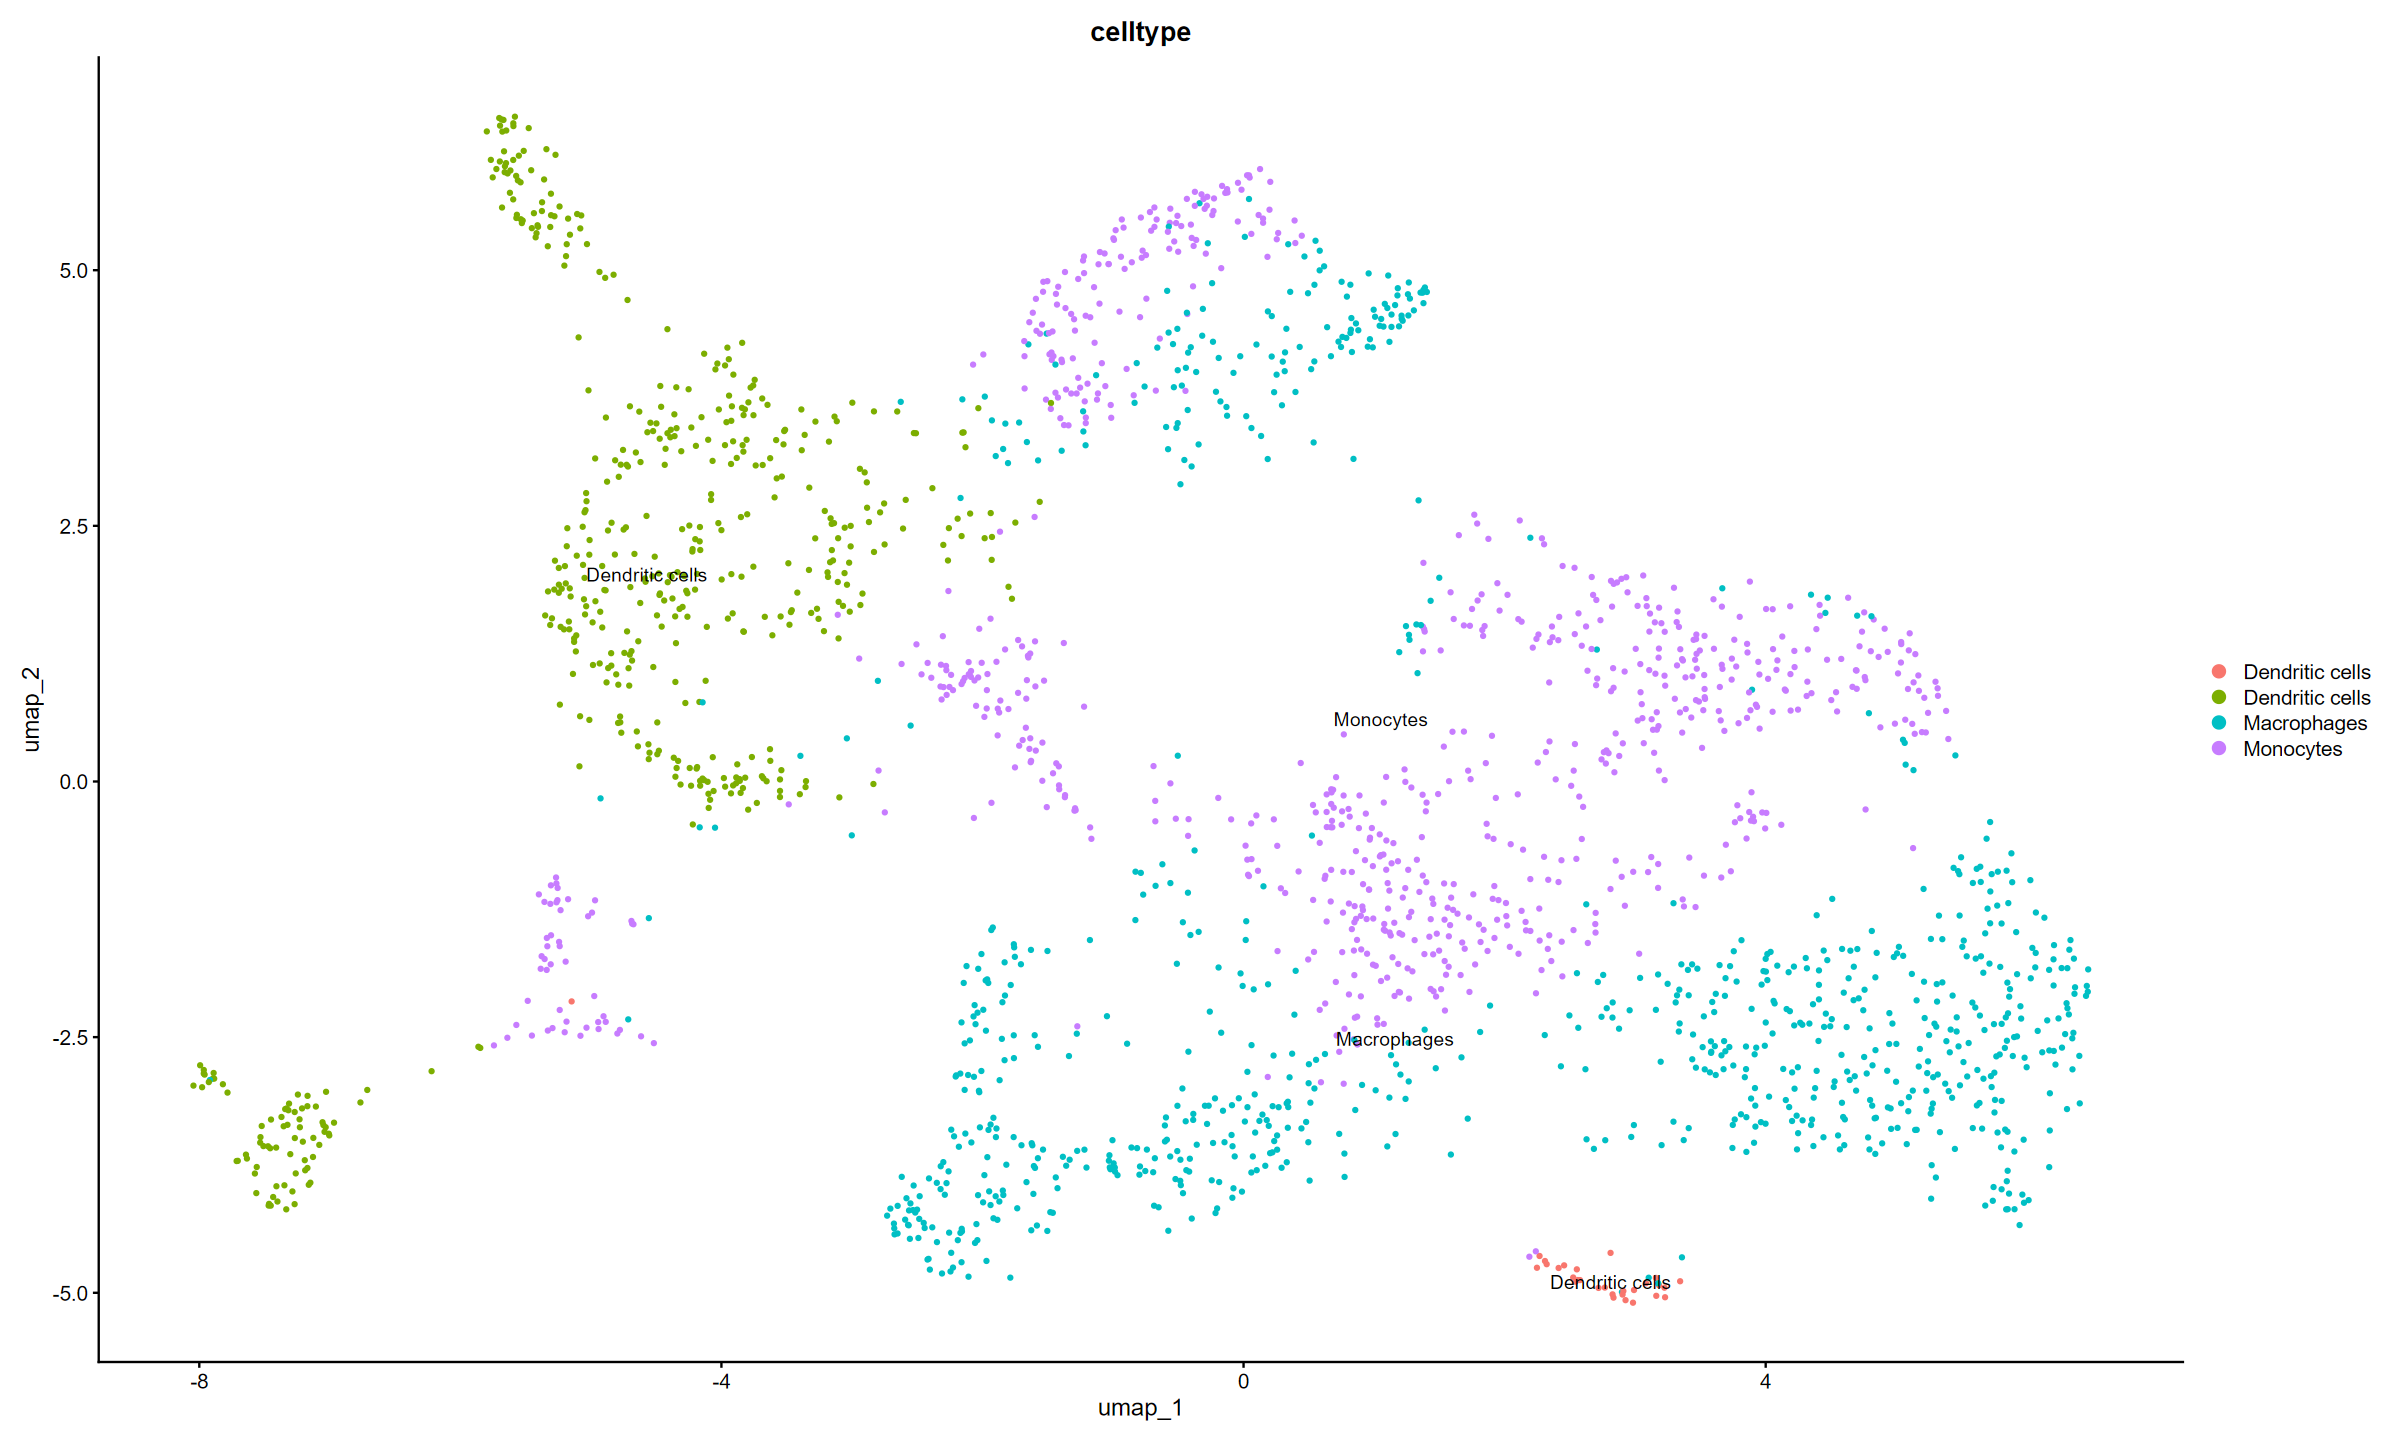

In [ ]:
# Visualize cell type annotation on UMAP
DimPlot(myeloid_data, reduction="umap", group.by='celltype', label=TRUE)

In [ ]:
# Find markers for each cluster
markers <- FindAllMarkers(myeloid_data, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers %>%  group_by(cluster) %>% filter(p_val_adj < 0.05) %>% slice_max(order_by = avg_log2FC, n = 10) %>% arrange(cluster, desc(pct.1)) 

Calculating cluster Macrophages

Calculating cluster Dendritic cells

Calculating cluster Monocytes

Calculating cluster Dendritic cells 

Calculating cluster T-cell



p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster         
1  6.796758e-198 3.336385   0.906 0.430 2.084022e-193 Macrophages     
2  6.986941e-196 3.463282   0.887 0.316 2.142336e-191 Macrophages     
3  3.360154e-193 3.566956   0.883 0.336 1.030291e-188 Macrophages     
4  3.189395e-119 3.421216   0.675 0.163 9.779323e-115 Macrophages     
5   8.656281e-71 3.589649   0.436 0.057  2.654189e-66 Macrophages     
6   6.453183e-57 3.627001   0.395 0.072  1.978675e-52 Macrophages     
7   1.773504e-53 3.449058   0.383 0.072  5.437919e-49 Macrophages     
8   1.923819e-52 3.769798   0.344 0.044  5.898814e-48 Macrophages     
9   1.652225e-43 3.579590   0.326 0.062  5.066052e-39 Macrophages     
10  8.836206e-44 3.683467   0.305 0.044  2.709357e-39 Macrophages     
11 3.686080e-173 4.554287   0.640 0.079 1.130226e-168 Dendritic cells 
12 2.427930e-157 4.763731   0.537 0.045 7.444518e-153 Dendritic cells 
13 1.851539e-145 4.343002   0.473 0.030 5.677189e-141 Dendritic cells 
14  1.378250e-81 4.540397   0.409 0.070  4.225991e-77 Dendritic cells 
15  3.369922e-86 4.054596   0.366 0.044  1.033285e-81 Dendritic cells 
16 8.343705e-104 3.995967   0.360 0.025  2.558347e-99 Dendritic cells 
17  2.738799e-95 3.812070   0.330 0.022  8.397707e-91 Dendritic cells 
18 1.167174e-107 7.122595   0.296 0.006 3.578790e-103 Dendritic cells 
19  4.363429e-73 3.680506   0.261 0.018  1.337914e-68 Dendritic cells 
20  7.136350e-71 3.727107   0.253 0.018  2.188148e-66 Dendritic cells 
21 7.318860e-163 4.762565   0.840 0.080 2.244109e-158 Monocytes       
22 1.322469e-112 4.617890   0.715 0.090 4.054955e-108 Monocytes       
23 4.014341e-120 4.088382   0.715 0.078 1.230877e-115 Monocytes       
24 6.433522e-164 5.167203   0.632 0.032 1.972647e-159 Monocytes       
25 2.360055e-113 5.014629   0.590 0.052 7.236400e-109 Monocytes       
26  2.850739e-87 4.088550   0.465 0.040  8.740934e-83 Monocytes       
27  3.293444e-60 4.369698   0.361 0.037  1.009836e-55 Monocytes       
28 2.890963e-103 6.406479   0.319 0.008  8.864270e-99 Monocytes       
29  3.053612e-63 4.417381   0.312 0.023  9.362984e-59 Monocytes       
30  8.152332e-80 5.123481   0.257 0.007  2.499668e-75 Monocytes       
31 1.519525e-188 6.917144   0.800 0.025 4.659166e-184 Dendritic cells 
32 1.538375e-222 9.546815   0.769 0.015 4.716967e-218 Dendritic cells 
33 9.294826e-274 8.691774   0.677 0.003 2.849979e-269 Dendritic cells 
34 6.748767e-222 8.927850   0.554 0.003 2.069307e-217 Dendritic cells 
35 7.884943e-163 7.572645   0.492 0.006 2.417681e-158 Dendritic cells 
36  2.889595e-92 6.610375   0.477 0.020  8.860075e-88 Dendritic cells 
37 3.475605e-118 6.542029   0.462 0.011 1.065690e-113 Dendritic cells 
38 6.457670e-137 7.760311   0.415 0.005 1.980051e-132 Dendritic cells 
39  1.817251e-88 8.123992   0.292 0.005  5.572055e-84 Dendritic cells 
40  5.393266e-99 7.203460   0.292 0.003  1.653683e-94 Dendritic cells 
41  3.006538e-47 5.238926   0.724 0.064  9.218645e-43 T-cell          
42  9.943346e-45 5.163091   0.621 0.047  3.048829e-40 T-cell          
43 1.464644e-113 6.723066   0.483 0.007 4.490891e-109 T-cell          
44  6.344284e-67 7.127584   0.414 0.011  1.945284e-62 T-cell          
45  1.367886e-59 5.927462   0.414 0.013  4.194211e-55 T-cell          
46  1.480068e-40 6.583807   0.345 0.014  4.538184e-36 T-cell          
47  1.102806e-29 6.094110   0.310 0.016  3.381424e-25 T-cell          
48  8.233571e-23 5.365151   0.310 0.022  2.524578e-18 T-cell          
49  2.625232e-47 6.527164   0.276 0.007  8.049487e-43 T-cell          
50  7.545686e-28 5.408847   0.276 0.014  2.313658e-23 T-cell          
   gene     
1  C1qb     
2  C1qc     
3  C1qa     
4  Ms4a7    
5  Igf1     
6  Maf      
7  Rnase4   
8  Gas6     
9  Cbr2     
10 Folr2    
11 Cd209a   
12 Klrd1    
13 H2-Oa    
14 Ifitm1   
15 Il1r2    
16 Amica1   
17 Siglecg  
18 Cd7      
19 Bcl11a   
20 Ap1s3    
21 Ly6c2    
22 Thbs1    
23 F10      
24 Hp       
25 Chil3    
26 Gm9733   
27 Rhov     
28 Vcan     
29 Dm

In [ ]:
# Assign cll typee labls based on DGE analysis
myeloid_data <- SetIdent(myeloid_data, value = "seurat_clusters")
myeloid_data <- RenameIdents(myeloid_data,
                                   '0' = 'Macrophages',
                                   '1' = 'Macrophages',
                                   '2' = 'Macrophages', 
                                   '3' = 'Macrophages',
                                   '4' = 'Macrophages',
                                   '5' = 'Dendritic cells',
                                   '6' = 'Dendritic cells',
                                   '7' = 'Monocytes',
                                   '8' = 'Macrophages', 
                                   '9' = 'Macrophages',
                                   '10' = 'Macrophages',
                                   '11' = 'Dendritic cells',
                                   '12' = 'Macrophages',
                                   '13' = 'Dendritic cells ', 
                                   '14' = 'Dendritic cells',
                                   '15' = 'T-cell') 
# Proportion tables
annotations_per_origin <- table(Idents(myeloid_data), myeloid_data$orig.ident)
annotations_per_origin_prop <- prop.table(table(Idents(myeloid_data), myeloid_data$orig.ident), margin = 2) * 100

# Subtype plots after annotation
subtype_annotated_plot <- DimPlot(myeloid_data, reduction = "umap", label = TRUE)
subtype_origin_plot <- DimPlot(myeloid_data, reduction = "umap", group.by = "orig.ident", label = TRUE)


# Combine tables side by side
combined_df <- cbind(annotations_per_origin, annotations_per_origin_prop)

Healthy (CD20, CD8, CHOW) HFD 10/11 HFD/ WD 20
Macrophages      167                       518       779       
Dendritic cells   69                       198       200       
Monocytes         32                        64        48       
Dendritic cells    5                        32        28       
T-cell             1                         0        28       
                 Healthy (CD20, CD8, CHOW) HFD 10/11 HFD/ WD 20
Macrophages      60.9489051                63.793103 71.929825 
Dendritic cells  25.1824818                24.384236 18.467221 
Monocytes        11.6788321                 7.881773  4.432133 
Dendritic cells   1.8248175                 3.940887  2.585411 
T-cell            0.3649635                 0.000000  2.585411

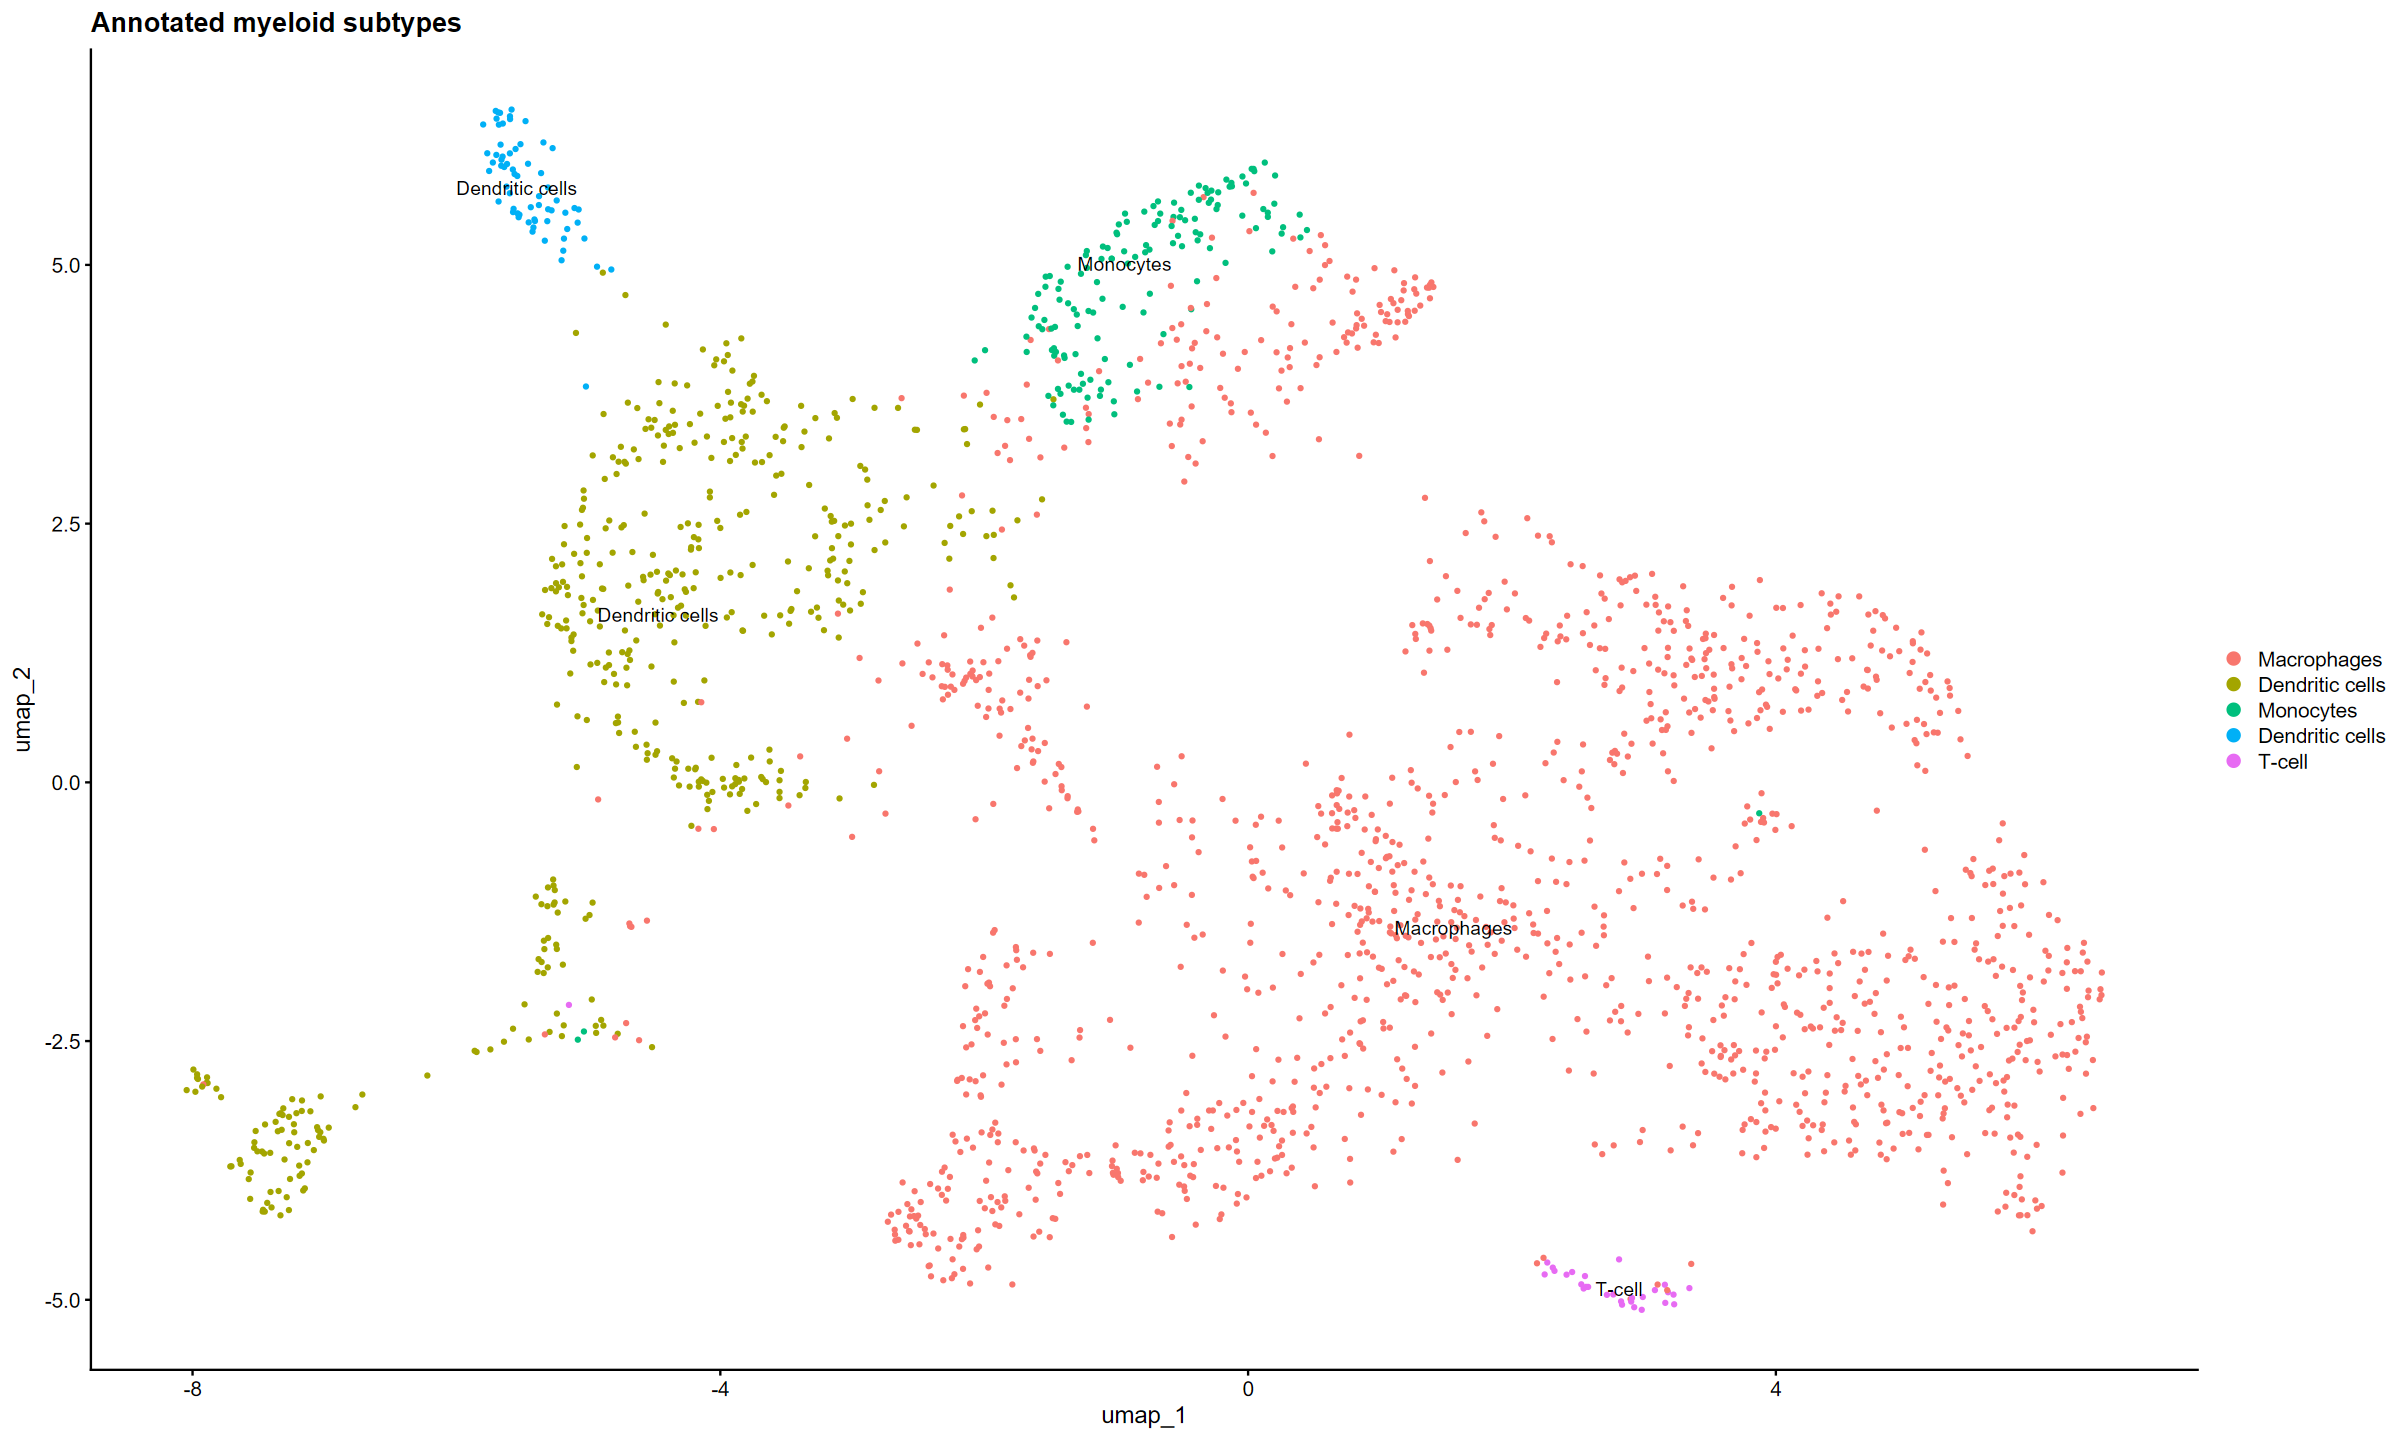

In [ ]:
# Plot table
combined_df

# Plotting annotations and titles
grid.arrange(
    subtype_annotated_plot + ggtitle("Annotated myeloid subtypes")
    subtype_origin_plot + ggtitle("DimPlot by origin")
    ncol=1
)

In [28]:
# Assign old labels
myeloid_data <- SetIdent(myeloid_data, value = "seurat_clusters")

# Find markers between 3 and 7 (Monocytes)
markers.3_7 <- FindMarkers(myeloid_data, ident.1 = "12", ident.2 = "7",  only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers.3_7 %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 5) %>%
  ungroup() -> top10

# Markers
markers.3_7 %>% filter(p_val_adj < 0.05) %>% slice_max(order_by = avg_log2FC, n = 10) %>% arrange(desc(pct.1))

# Find markers between 3 and 2 (Macrophages)
markers.3_7 <- FindMarkers(myeloid_data, ident.1 = "12", ident.2 = "1",  only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers.3_7 %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 5) %>%
  ungroup() -> top10

# Markers
markers.3_7 %>% filter(p_val_adj < 0.05) %>% slice_max(order_by = avg_log2FC, n = 10) %>% arrange(desc(pct.1))

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
Fcrls   2.766391e-22 6.134426   0.658 0.069 8.482309e-18
Mgl2    2.015709e-23 6.072276   0.616 0.021 6.180566e-19
Ccl12   1.198033e-15 6.358139   0.507 0.056 3.673409e-11
Gas6    1.646810e-17 7.047973   0.452 0.007 5.049448e-13
Slco2b1 1.064558e-15 5.719727   0.425 0.014 3.264147e-11
Igfbp4  8.965245e-16 6.444765   0.411 0.007 2.748923e-11
Gpr34   4.062419e-15 5.898852   0.411 0.014 1.245619e-10
Gna12   3.457497e-15 6.163229   0.397 0.007 1.060138e-10
Lilra5  8.730595e-15 7.482187   0.370 0.000 2.676975e-10
Ophn1   4.672550e-14 5.709051   0.370 0.007 1.432697e-09

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
Hspa1a   8.355844e-18 2.340018   0.932 0.607 2.562069e-13
Hsp90aa1 2.427175e-14 2.038454   0.890 0.559 7.442205e-10
Hspa1b   8.079937e-16 2.323552   0.726 0.231 2.477470e-11
Hsph1    2.978263e-10 2.260117   0.411 0.101 9.131949e-06
Flcn     5.945331e-08 2.082612   0.315 0.077 1.822957e-03
Pyhin1   2.661538e-08 2.940559   0.288 0.057 8.160808e-04
Oasl2    3.829219e-07 2.551310   0.288 0.069 1.174115e-02
Ythdf3   3.857632e-08 2.087408   0.288 0.057 1.182827e-03
Ifih1    2.261014e-10 3.243696   0.260 0.028 6.932721e-06
Arl5b    2.957793e-07 2.014057   0.260 0.057 9.069185e-03

In [ ]:
# SUbset macrophages
macrophages <- subset(myeloid_data, idents = "Macrophages")
macrophages <- CreateSeuratObject(counts = macrophages@assays$RNA$counts)

In [ ]:
# View distribution of mouse origins
table(macrophages$orig.ident)


Healthy (CD20, CD8, CHOW)                 HFD 10/11                HFD/ WD 20 
                      167                       518                       779 

In [48]:
# Preprocessing function which performs a basic workflow for scRNA seq analysis
pre_process <- function(data, nFeatures_RNA = 200, nCounts_RNA = 3, percents.mt = 5, pattern = "MT", resolutions = seq(0.5, 1.5, by = 0.1), k.weights = 100) {
    # Split
    data[["RNA"]] <- split(data[["RNA"]], f = data$orig.ident)

    # Get percentage mt                     
    data[["percent.mt"]] <- PercentageFeatureSet(data, pattern = sprintf("^%s-", pattern))

    # Subsets
    data <- subset(x = data, subset = nFeature_RNA >= nFeatures_RNA & nCount_RNA >= nCounts_RNA & percent.mt <= percents.mt)

    # Normalization
    data <- NormalizeData(data, normalization.method = "LogNormalize", scale.factor = 10000)
    
    # Find Variable features
    data <- FindVariableFeatures(data, selection.method = "vst", nfeatures = 2000)
    
    # Scale Data
    data <- ScaleData(data, vars.to.regress = c("percent.mt", "nFeature_RNA"))
    
    # Run PCA
    data <- RunPCA(data, npcs = 100, verbose=FALSE)

    # Get significant PCAs through Jackstrawplot
    data <- JackStraw(data, num.replicate = 100)
    data <- ScoreJackStraw(data, dims = 1:20)

    # Check the amount of significant pcs
    significant_pcs <- length(which(data@reductions$pca@jackstraw$overall.p.values < 0.05))

    # Run UMAP
    data <- RunUMAP(data, reduction = "pca", dims = 1:significant_pcs, reduction.name="umap_before_integration", verbose=FALSE)

    # Integrate
    data <- IntegrateLayers(
        object = data, 
        method = CCAIntegration, 
        orig.reduction = "pca", 
        new.reduction = "integrated.cca", 
        k.weight = 
        k.weights,
        verbose = FALSE)

    data[["RNA"]] <- JoinLayers(data[["RNA"]])

    # Post integration processing
    data <- RunPCA(data, npcs = 100, verbose=FALSE)

    # Get significant PCAs through Jackstrawplot
    data <- JackStraw(data, num.replicate = 100)
    data <- ScoreJackStraw(data, dims = 1:20)

    # Check the amount of significant pcs
    significant_pcs <- length(which(data@reductions$pca@jackstraw$overall.p.values < 0.05))

    # Clustering
    data <- FindNeighbors(data, reduction = "integrated.cca", dims = 1:significant_pcs)
    data <- FindClusters(data, resolution = resolutions)
    data <- RunUMAP(data, dims = 1:significant_pcs, reduction = "integrated.cca", verbose=FALSE)

    return(data)
}

macrophages_processed <- pre_process(macrophages)

Normalizing layer: counts.HFD/_WD_20

Normalizing layer: counts.HFD_10/11

Normalizing layer: counts.Healthy_CD20,_CD8,_CHOW

Finding variable features for layer counts.HFD/_WD_20

Finding variable features for layer counts.HFD_10/11

Finding variable features for layer counts.Healthy_CD20,_CD8,_CHOW

Regressing out percent.mt, nFeature_RNA

Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1464
Number of edges: 52304

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8171
Number of communities: 6
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1464
Number of edges: 52304

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7972
Number of communities: 6
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1464
Number of edges: 52304

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7787
Number of communities: 7
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1464
Number of edges: 52304

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7606
Number of communities: 8
Elapsed time: 0 seconds
Modularity Optimizer ver

In [ ]:
# Save object
saveRDS(macrophages_processed, "all_mice_macrophage_subset.rds")

In [15]:
# Koen marker dot plots 
features_macrophage <- c("Lyz2", "Csf1r", "Cd68", "Aif1", "Cybb", "Cd14", "Dab2", "Ccl6", "Clec4a2", "Ms4a7", "H2-Ab1", "H2-Eb1")
features_dcs <- c("Cd14", "Cd68", "Cd86", "Cd1c", "Fcgr2b", "Clec10a", "Fcer1a", "HLA-dqa2", "Hla-dqb2")
features_monocytes <- c("Cd2", "Itgam", "Pecam1", "Ncam1", "Sell", "Csf1r", "Fcgr3a", "Ccr2", "Ccr5", "Itgax", "Cxcr1")

In [16]:
# Visualizing DotPlots to view marker genes
macrophage_dot <- DotPlot(myeloid_data, features = features_macrophage) + 
  ggtitle("Markers for Macrophages") + RotatedAxis()
monocyte_dot <- DotPlot(myeloid_data, features = features_monocytes) + 
  ggtitle("Markers for monocytes") + RotatedAxis()
dc_dot <- DotPlot(myeloid_data, features = features_dcs) + 
  ggtitle("Markers for dendritic cells") + RotatedAxis()

Warning message:
"The following requested variables were not found: Fcgr3a"
Warning message:
"The following requested variables were not found: Cd1c, HLA-dqa2, Hla-dqb2"


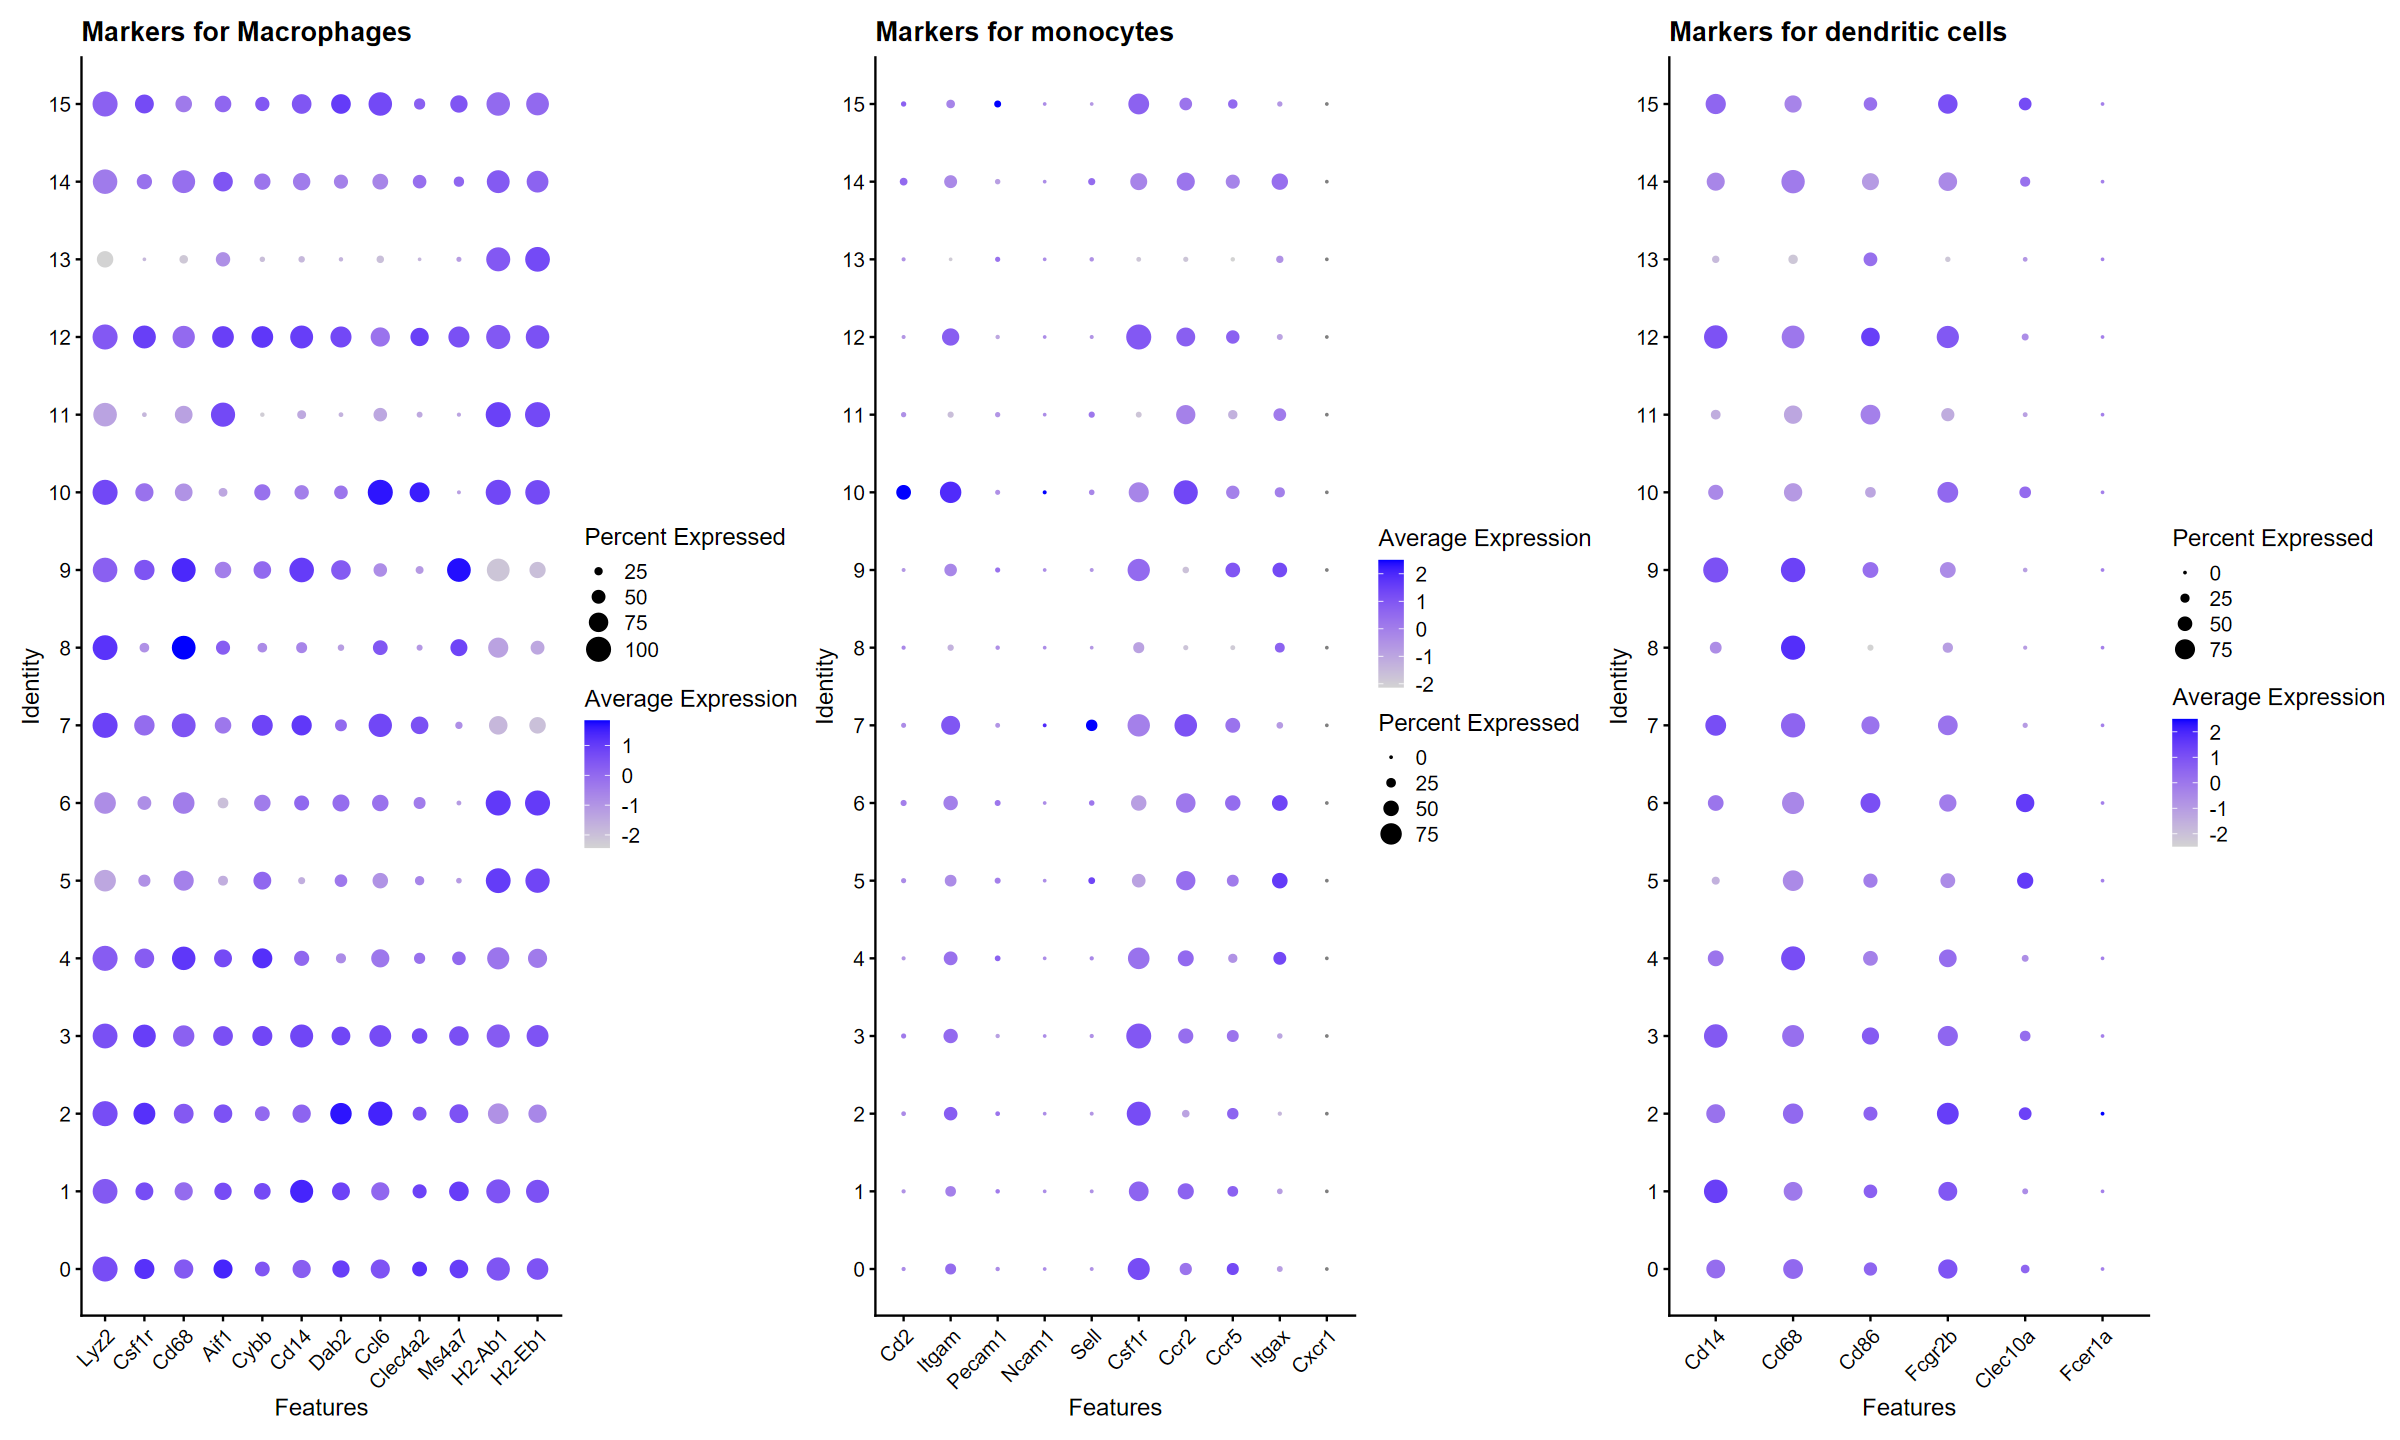

In [ ]:
# Plot marker genes of macrophages, monocytes & dendritic cells
macrophage_dot +  monocyte_dot + dc_dot